## Importing the libraries & exploring the data

In [388]:
# Importing all the requisite libraries

import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

sns.set(color_codes=True)
%matplotlib inline 

In [389]:
# Converted the data file to .xlsx format
# Reading the dataset

sig_df = pd.read_excel(r'C:\Users\rdsri\OneDrive\signal-data.xlsx')
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [390]:
org_df = sig_df.copy()

In [391]:
sig_df.head()

Time        0        1          2          3       4      5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972   
3  

In [392]:
sig_df.shape

(1567, 592)

## Data Cleaning

   - Treating missing values
   - Dropping attributes if required
   - Making all the relevant modifications on the data

In [393]:
#Finding the null values

sig_df.isnull().sum()

Time            0
0               6
1               7
2              14
3              14
4              14
5              14
6              14
7               9
8               2
9               2
10              2
11              2
12              2
13              3
14              3
15              3
16              3
17              3
18              3
19             10
20              0
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              1
33              1
34              1
35              1
36              1
37              1
38              1
39              1
40             24
41             24
42              1
43              1
44              1
45              1
46              1
47              1
48              1
49              1
50              1
51              1
52              1
53              4
54        

In [394]:
sig_df.head()

Time        0        1          2          3       4      5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972   
3  

In [395]:
#Creating a list for collecting all the dropped features to later prepare the new unseen data

dropped_feat = []

In [396]:
#Checking the columns which have half the rows as Null

count = 0
newlist = []
for col in sig_df:

    if (sig_df[col].isnull().sum()) >= (np.round(len(sig_df)/2)):
#         print("drop:",col)
        newlist.append(col)
        count = count + 1
#         sig_df.drop([col],axis=1)

dropped_feat = newlist                        #Adding these columns to 'dropped_feat' list to use later


If half the rows of a particular column contains null values, we can drop that particular. The above code checks for those columns.

In [397]:
#Dropping the columns found from the above code 

sig_df.drop(sig_df[newlist],axis = 1, inplace = True)

In [398]:
sig_df.drop(['Time'], axis = 1, inplace = True)            #Dropping Time column

In [399]:
dropped_feat.append('Time')                     #Adding Time column to the 'dropped_feat' list

In [400]:
sig_df.shape    #Shape after dropping

(1567, 563)

In [401]:
sig_df.head()   #Displaying the dataset

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9      10      11        12   13       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661  420.5925  10.3387   

       17        18       19      20       21       22       23       24  \
0  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00   
1  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25   
2  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50   
3  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25   
4  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25 -3987.50   117.00   

       25      26      27       28      29      30      31       32      33  \
0  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971  9.5126   
1  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052  9.7997   
2  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590   
3  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105  8.6789   
4  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269  8.7677   

        34       35       36       37       38        39     40     41    42  \
0  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515  70.0   
1  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773  70.0   
2  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434  70.0   
3  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279  70.0   
4  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364  76.39  2.209  70.0   

         43       44        45        46      47        48   49        50  \
0  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282  1.0  624.3145   
1  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445  1.0  631.2618   
2  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845  1.0  637.2655   
3  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427  1.0  637.3727   
4  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882  1.0  667.7418   

         51   52     53     54      55      56      57      58       59  \
0  218.3174  0.0  4.592  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  205.1695  0.0  4.590  4.842  2853.0  0.9324  0.9479  4.6820   0.8073   
2  185.7574  0.0  4.486  4.748  2936.0  0.9139  0.9447  4.5873  23.8245   
3  189.9079  0.0  4.486  4.748  2936.0  0.9139  0.9447  4.5873  24.3791   
4  233.5491  0.0  4.624  4.894  2865.0  0.9298  0.9449  4.6414 -12.2945   

         60       61        62       63       64       65        66      67  \
0  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226   
1  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598   
2  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694   
3  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761   
4  355.0809   9.7948  144.0191  21.9782  32.2945  44.1498  745.6025  0.9256   

         68   69        70       71   74      75      76      77      78  \
0  148.6009  1.0  608.1700  84.0793  0.0  0.0126 -0.0206  0.0141 -0.0307   
1  154.3709  1.0  620.3582  82.3494  0.0 -0.0039 -0.0198  0.0004 -0.0440   
2  145.8000  1.0  625.9636  8

In [402]:
sig_df.fillna(0, inplace=True)           #Filling NA values with 0

In [403]:
sig_df.head(10)                          #Displaying the dataset

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
7  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
8  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
9  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   

        8       9      10      11        12   13       14        15       16  \
0  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558  414.8710  10.0433   
1  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548  414.7347   9.2599   
2  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157  416.7075   9.3144   
3  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052  422.2894   9.6924   
4  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661  420.5925  10.3387   
5  1.5287  0.0167  0.0055  0.9699  200.4720  0.0   8.6617  414.2426   9.2441   
6  1.5816 -0.0270  0.0105  0.9591  202.0901  0.0   9.0350  415.8852   9.9990   
7  1.5153  0.0157  0.0007  0.9481  202.4170  0.0  13.6872  408.4017   9.6836   
8  1.5358  0.0111 -0.0066  0.9494  202.4544  0.0  12.6837  417.6009   9.7046   
9  1.5381  0.0159  0.0049  0.9440  202.5999  0.0  12.4278  413.3677   9.7046   

       17        18       19      20       21       22       23       24  \
0  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00   
1  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25   
2  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50   
3  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25   
4  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25 -3987.50   117.00   
5  0.9747  191.2280  12.4935  1.3836 -6058.00  2953.75 -3906.50   193.75   
6  0.9667  192.0912  12.4608  1.4067 -6154.00  2691.75 -3914.75   580.25   
7  0.9687  192.7334  12.5263  1.4092 -5395.50  2551.75 -3819.75  -737.00   
8  0.9693  192.7498  12.5263  1.4278 -4196.50  2059.50 -2948.00   622.75   
9  0.9667  192.8953  12.5263  1.4185 -5357.50  2872.50 -3911.50   873.75   

       25      26      27       28      29      30      31       32      33  \
0  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971  9.5126   
1  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052  9.7997   
2  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590   
3  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105  8.6789   
4  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269  8.7677   
5  0.8930  1.7775  3.0505  62.3778  1.6333  0.1394  3.5200  85.4233  9.6484   
6  0.9063  1.7715  3.0515  60.8000  2.4889  0.2081  3.4927  87.1543  9.1502   
7  1.3280  1.9893  7.3885  67.3000  2.7889  0.2239  3.4588  83.8887  8.7289   
8  0.6830  1.3230  2.2675  62.8000  2.1444  0.1844  3.5067  85.4274  9.6234   
9  0.9002  1.7780  3.0995  67.0333  2.3778  0.1946  3.5207  83.8887  8.7289   

        34       35       36       37       38        39     40     41    42  \
0  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515  70.0   
1  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773  70.0   
2  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434  70.0   
3  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279  70.0   
4  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364  76.39  2.209  70.0   
5  50.5795  64.0720  49.4205  66.2949  87.0273  117.4928  59.94  3.024  70.0   
6 

In [404]:
#Checking for highly correlated columns to drop

threshold = 0.85

corr_matrix = sig_df.corr()
corr_matrix.head()

0         1         2         3         4         5         6  \
0  1.000000 -0.047782  0.007590  0.009448 -0.000915  0.008706  0.006129   
1 -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.030127 -0.031616   
2  0.007590 -0.030448  1.000000  0.323782  0.020438  0.990089  0.818770   
3  0.009448  0.006021  0.323782  1.000000 -0.054015  0.286397 -0.119180   
4 -0.000915  0.002192  0.020438 -0.054015  1.000000  0.007041 -0.034736   

          7         8         9        10        11        12  13        14  \
0  0.010738 -0.050979  0.009959 -0.010253  0.013038  0.021365 NaN -0.058009   
1 -0.025086  0.027609  0.003704  0.028889  0.009722  0.008212 NaN  0.017214   
2  0.747230  0.002600 -0.045731  0.004713 -0.011469 -0.010719 NaN -0.012309   
3  0.279646 -0.108217  0.051567  0.046281 -0.035772 -0.058282 NaN -0.026669   
4 -0.475861 -0.020082  0.053859 -0.006505  0.001362  0.000526 NaN -0.017112   

         15        16        17        18        19        20        21  \
0  0.013962 -0.002250  0.012261  0.023585  0.010113 -0.007342 -0.025226   
1 -0.000023  0.002047  0.023212  0.019432 -0.007581  0.050178  0.020399   
2 -0.009343  0.005165 -0.002888 -0.013282  0.025736  0.006447  0.001081   
3 -0.032513 -0.007943 -0.017460 -0.040251  0.000716  0.037538  0.009006   
4  0.009547 -0.001273  0.002358  0.001656  0.005752  0.012833  0.007304   

         22        23        24        25        26        27        28  \
0  0.027996 -0.007591 -0.016491  0.011886  0.020927  0.012133  0.060231   
1 -0.018847 -0.026097 -0.074160 -0.022150 -0.022685 -0.015609 -0.005010   
2 -0.008963  0.042508 -0.011340 -0.027246 -0.024152 -0.027503 -0.042699   
3 -0.022624  0.001474 -0.050055  0.074149  0.036573  0.078740  0.082009   
4 -0.006797  0.005040 -0.013702  0.027770  0.010972  0.028338  0.007223   

         29        30        31        32        33        34        35  \
0  0.001072 -0.022881  0.009555  0.000576 -0.004361  0.003312  0.006871   
1 -0.025961 -0.004717 -0.010433 -0.016228 -0.004064 -0.014994 -0.017616   
2  0.006223  0.013223  0.015232  0.003556  0.001566  0.001788  0.010744   
3 -0.006764  0.008643 -0.089499 -0.007227 -0.035723  0.001030  0.051171   
4 -0.012178  0.002324 -0.033636 -0.002867  0.012276  0.002324 -0.004535   

         36        37        38        39        40        41        42  \
0 -0.002194  0.000013 -0.009836  0.004458  0.052206  0.028110 -0.013299   
1  0.011899  0.000332 -0.001337 -0.012124  0.006442  0.014031 -0.024346   
2 -0.011426  0.003493  0.003718 -0.015727 -0.014364  0.013273 -0.000297   
3  0.005532  0.007167 -0.002897  0.011559 -0.013841 -0.017038  0.015006   
4 -0.000681  0.002111 -0.002007  0.007056  0.026396 -0.011345  0.001174   

         43        44        45        46        47        48        49  \
0 -0.033526  0.013173  0.012930 -0.010597 -0.041180 -0.009274 -0.013299   
1 -0.029295 -0.005104 -0.030731 -0.036652  0.008303 -0.006693 -0.024346   
2  0.005699 -0.017174 -0.029958 -0.017138 -0.007827 -0.041683 -0.000297   
3  0.000136  0.045122 -0.030276 -0.015223  0.001874 -0.015931  0.015006   
4 -0.005906 -0.004283  0.053289  0.026775  0.003208 -0.021566  0.001174   

         50        51  52        53        54        55        56        57  \
0 -0.017010 -0.037522 NaN  0.000632  0.000994 -0.011776 -0.002660 -0.002643   
1 -0.034260 -0.012150 NaN -0.018160 -0.021015 -0.008801 -0.011416 -0.008215   
2 -0.023890 -0.003909 NaN -0.001065  0.001111 -0.002125 -0.000702 -0.003458   
3 -0.019248 -0.011431 NaN  0.001883  0.002606  0.010012  0.009403  0.012318   
4  0.014785  0.006825 NaN  0.009716  0.009596 -0.006659 -0.002189  0.002747   

         58        59        60        61        62        63        64  \
0 -0.003774 -0.071879 -0.018261 -0.000725 -0.005340 -0.012150  0.015013   
1 -0.017039  0.004685 -0.015200  0.008874 -0.031340  0.016609  0.024595   
2  0.011671  0.014026  0.092409  0.109121  0.014139  0.025421  0.038915   
3  0.026562 -0.017810 -0.007941  0.020263 -0.019484 -0

In [405]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

0         1         2         3         4         5         6         7  \
0 NaN -0.047782  0.007590  0.009448 -0.000915  0.008706  0.006129  0.010738   
1 NaN       NaN -0.030448  0.006021  0.002192 -0.030127 -0.031616 -0.025086   
2 NaN       NaN       NaN  0.323782  0.020438  0.990089  0.818770  0.747230   
3 NaN       NaN       NaN       NaN -0.054015  0.286397 -0.119180  0.279646   
4 NaN       NaN       NaN       NaN       NaN  0.007041 -0.034736 -0.475861   

          8         9        10        11        12  13        14        15  \
0 -0.050979  0.009959 -0.010253  0.013038  0.021365 NaN -0.058009  0.013962   
1  0.027609  0.003704  0.028889  0.009722  0.008212 NaN  0.017214 -0.000023   
2  0.002600 -0.045731  0.004713 -0.011469 -0.010719 NaN -0.012309 -0.009343   
3 -0.108217  0.051567  0.046281 -0.035772 -0.058282 NaN -0.026669 -0.032513   
4 -0.020082  0.053859 -0.006505  0.001362  0.000526 NaN -0.017112  0.009547   

         16        17        18        19        20        21        22  \
0 -0.002250  0.012261  0.023585  0.010113 -0.007342 -0.025226  0.027996   
1  0.002047  0.023212  0.019432 -0.007581  0.050178  0.020399 -0.018847   
2  0.005165 -0.002888 -0.013282  0.025736  0.006447  0.001081 -0.008963   
3 -0.007943 -0.017460 -0.040251  0.000716  0.037538  0.009006 -0.022624   
4 -0.001273  0.002358  0.001656  0.005752  0.012833  0.007304 -0.006797   

         23        24        25        26        27        28        29  \
0 -0.007591 -0.016491  0.011886  0.020927  0.012133  0.060231  0.001072   
1 -0.026097 -0.074160 -0.022150 -0.022685 -0.015609 -0.005010 -0.025961   
2  0.042508 -0.011340 -0.027246 -0.024152 -0.027503 -0.042699  0.006223   
3  0.001474 -0.050055  0.074149  0.036573  0.078740  0.082009 -0.006764   
4  0.005040 -0.013702  0.027770  0.010972  0.028338  0.007223 -0.012178   

         30        31        32        33        34        35        36  \
0 -0.022881  0.009555  0.000576 -0.004361  0.003312  0.006871 -0.002194   
1 -0.004717 -0.010433 -0.016228 -0.004064 -0.014994 -0.017616  0.011899   
2  0.013223  0.015232  0.003556  0.001566  0.001788  0.010744 -0.011426   
3  0.008643 -0.089499 -0.007227 -0.035723  0.001030  0.051171  0.005532   
4  0.002324 -0.033636 -0.002867  0.012276  0.002324 -0.004535 -0.000681   

         37        38        39        40        41        42        43  \
0  0.000013 -0.009836  0.004458  0.052206  0.028110 -0.013299 -0.033526   
1  0.000332 -0.001337 -0.012124  0.006442  0.014031 -0.024346 -0.029295   
2  0.003493  0.003718 -0.015727 -0.014364  0.013273 -0.000297  0.005699   
3  0.007167 -0.002897  0.011559 -0.013841 -0.017038  0.015006  0.000136   
4  0.002111 -0.002007  0.007056  0.026396 -0.011345  0.001174 -0.005906   

         44        45        46        47        48        49        50  \
0  0.013173  0.012930 -0.010597 -0.041180 -0.009274 -0.013299 -0.017010   
1 -0.005104 -0.030731 -0.036652  0.008303 -0.006693 -0.024346 -0.034260   
2 -0.017174 -0.029958 -0.017138 -0.007827 -0.041683 -0.000297 -0.023890   
3  0.045122 -0.030276 -0.015223  0.001874 -0.015931  0.015006 -0.019248   
4 -0.004283  0.053289  0.026775  0.003208 -0.021566  0.001174  0.014785   

         51  52        53        54        55        56        57        58  \
0 -0.037522 NaN  0.000632  0.000994 -0.011776 -0.002660 -0.002643 -0.003774   
1 -0.012150 NaN -0.018160 -0.021015 -0.008801 -0.011416 -0.008215 -0.017039   
2 -0.003909 NaN -0.001065  0.001111 -0.002125 -0.000702 -0.003458  0.011671   
3 -0.011431 NaN  0.001883  0.002606  0.010012  0.009403  0.012318  0.026562   
4  0.006825 NaN  0.009716  0.009596 -0.006659 -0.002189  0.002747 -0.005692   

         59        60        61        62        63        64        65  \
0 -0.071879 -0.018261 -0.000725 -0.005340 -0.012150  0.015013  0.003795   
1  0.004685 -0.015200  0.008874 -0.031340  0.016609  0.024595  0.013992   
2  0.014026  0.092409  0.109121  0.014139  0.025421  0.038915  0.011057   
3 -0.017810 -0.007941  0

In [406]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# dropped_feat.append([column for column in upper.columns if any(upper[column] > threshold)])
print("There are %d columns to remove." % (len(to_drop)))

There are 225 columns to remove.


In [407]:
to_drop

[5,
 18,
 27,
 30,
 34,
 38,
 39,
 49,
 50,
 54,
 55,
 56,
 57,
 58,
 61,
 65,
 66,
 68,
 69,
 70,
 101,
 123,
 124,
 127,
 131,
 132,
 133,
 140,
 147,
 148,
 152,
 154,
 164,
 165,
 174,
 196,
 197,
 199,
 204,
 205,
 206,
 207,
 209,
 249,
 252,
 270,
 271,
 272,
 273,
 274,
 275,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 316,
 317,
 318,
 319,
 320,
 321,
 323,
 324,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 376,
 377,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 415,
 416,
 417,
 420,
 421,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 434,
 435,
 436,
 437,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 

In [408]:
# Adding the highly correlated columns to the 'dropped_feat' list to use later

for el in to_drop:
#     print(el)
    dropped_feat.append(el)
        
# len(dropped_feat)

In [409]:
sig_df.drop(sig_df[to_drop],axis = 1, inplace = True)         #Dropping the highly correlated columns from the dataset

In [410]:
sig_df.head(5)   #Displaying the dataset

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10      11        12   13       14        15       16      17  \
0  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558  414.8710  10.0433  0.9680   
1 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548  414.7347   9.2599  0.9701   
2  0.0041  0.0013  0.9615  202.0179  0.0   9.5157  416.7075   9.3144  0.9674   
3 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052  422.2894   9.6924  0.9687   
4 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661  420.5925  10.3387  0.9735   

        19      20       21       22       23       24      25      26  \
0  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955  1.7730   
1  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973  2.0143   
2  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122  2.0295   
3  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137  2.0038   
4  12.4735  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887  1.9912   

        28      29      31       32      33       35       36       37     40  \
0  64.2333  2.0222  3.5191  83.3971  9.5126  64.2588  49.3830  66.3141  61.29   
1  68.4222  2.2667  3.4171  84.9052  9.7997  64.2828  49.3404  64.9193  78.25   
2  67.1333  2.3333  3.5986  84.7569  8.6590  64.1114  49.8470  65.8389  14.37   
3  62.9333  2.6444  3.3813  84.9105  8.6789  64.1125  49.4900  65.1951  76.90   
4  62.8333  3.1556  3.2728  86.3269  8.7677  64.1511  49.7520  66.1542  76.39   

      41    42        43       44        45        46      47        48  \
0  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   
3  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427   
4  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882   

         51   52     53       59        60        62       63       64  \
0  218.3174  0.0  4.592  -1.7264  350.9264  108.6427  16.1445  21.7264   
1  205.1695  0.0  4.590   0.8073  352.0073  113.9800  10.9036  19.1927   
2  185.7574  0.0  4.486  23.8245  364.5364  115.6273  11.3019  16.1755   
3  189.9079  0.0  4.486  24.3791  361.4582  116.1818  13.5597  15.6209   
4  233.5491  0.0  4.624 -12.2945  355.0809  144.0191  21.9782  32.2945   

       67       71   74      75      76      77      78      79      80  \
0  0.9226  84.0793  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026   
1  1.1598  82.3494  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120   
2  0.8694  84.7681  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134   
3  0.9761  70.2289  0.0 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051   
4  0.9256  65.8417  0.0 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178   

       81      82      83      84      86      87         88      89  \
0 -0.0567 -0.0044  7.2163  0.1320  2.3895  0.9690  1747.6049  0.1841   
1 -0.0377  0.0017  6.8043  0.1358  2.3754  0.9894  1931.6464  0.1874   
2 -0.0182  0.0287  7.1041  0.1362  2.4532  0.9880  1685.8514  0.1497   
3  0.0028  0.0277  7.5925  0.1302  2.4004  0.9904  1752.0968  0.1958   
4 -0.0123 -0.0048  7.5017  0.1342  2.4530  0.9902  1828.3846  0.1829   

          90      91      92      93      94      95      96   97      98  \
0  8671.9301 -0.3274 -0.0055 -0.0001  0.0001  0.0003 -0.2786  0.0  0.3974   
1  8407.0299  0.1455 -0.0015  0.0000 -0.0005  0.0001  0.5854  0.0 -0.9353   
2  9317.1698  0.0553  0.0006 -0.0013  0.0000  0.0002 -0.1343  0.0 -0.1427   
3  8205.7000  0.0697 -0.0003 -0.0

In [411]:
sig_df.shape            #Shape after dropping

(1567, 338)

In [412]:
# Finding columns with constant values to drop

constant_cols = []
for cols in sig_df:
#     print(cols)
    if len(sig_df[cols].unique())==1:
#         print(cols)
        constant_cols.append(cols)
    
print(constant_cols)


[13, 52, 97, 141, 149, 178, 179, 186, 189, 190, 191, 192, 193, 194, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 414, 422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 481, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]


In [413]:
sig_df.drop(sig_df[constant_cols],axis = 1, inplace = True)      #Dropping the columns

In [414]:
#Adding the above dropped columns to the 'dropped_feat' list to use later

for el in constant_cols:
    dropped_feat.append(el)
    

In [415]:
sig_df.shape                      #Shape after dropping

(1567, 226)

In [416]:
sig_df.head()                     #Displaying the dataset

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10      11        12       14        15       16      17  \
0  0.0162 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  0.9680   
1 -0.0005 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  0.9701   
2  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  0.9674   
3 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  0.9687   
4 -0.0031 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  0.9735   

        19      20       21       22       23       24      25      26  \
0  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955  1.7730   
1  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973  2.0143   
2  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122  2.0295   
3  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137  2.0038   
4  12.4735  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887  1.9912   

        28      29      31       32      33       35       36       37     40  \
0  64.2333  2.0222  3.5191  83.3971  9.5126  64.2588  49.3830  66.3141  61.29   
1  68.4222  2.2667  3.4171  84.9052  9.7997  64.2828  49.3404  64.9193  78.25   
2  67.1333  2.3333  3.5986  84.7569  8.6590  64.1114  49.8470  65.8389  14.37   
3  62.9333  2.6444  3.3813  84.9105  8.6789  64.1125  49.4900  65.1951  76.90   
4  62.8333  3.1556  3.2728  86.3269  8.7677  64.1511  49.7520  66.1542  76.39   

      41    42        43       44        45        46      47        48  \
0  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   
3  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427   
4  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882   

         51     53       59        60        62       63       64      67  \
0  218.3174  4.592  -1.7264  350.9264  108.6427  16.1445  21.7264  0.9226   
1  205.1695  4.590   0.8073  352.0073  113.9800  10.9036  19.1927  1.1598   
2  185.7574  4.486  23.8245  364.5364  115.6273  11.3019  16.1755  0.8694   
3  189.9079  4.486  24.3791  361.4582  116.1818  13.5597  15.6209  0.9761   
4  233.5491  4.624 -12.2945  355.0809  144.0191  21.9782  32.2945  0.9256   

        71   74      75      76      77      78      79      80      81  \
0  84.0793  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567   
1  82.3494  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377   
2  84.7681  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182   
3  70.2289  0.0 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028   
4  65.8417  0.0 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178 -0.0123   

       82      83      84      86      87         88      89         90  \
0 -0.0044  7.2163  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301   
1  0.0017  6.8043  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299   
2  0.0287  7.1041  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698   
3  0.0277  7.5925  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000   
4 -0.0048  7.5017  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600   

       91      92      93      94      95      96      98      99     100  \
0 -0.3274 -0.0055 -0.0001  0.0001  0.0003 -0.2786  0.3974 -0.0251  0.0002   
1  0.1455 -0.0015  0.0000 -0.0005  0.0001  0.5854 -0.9353 -0.0158 -0.0004   
2  0.0553  0.0006 -0.0013  0.0000  0.0002 -0.1343 -0.1427  0.1218  0.0006   
3  0.0697 -0.0003 -0.0021 -

In [417]:
#Checking for duplicate columns

def getDuplicateColumns(df): 

    duplicateColumnNames = set() 
    for x in range(df.shape[1]): 
        col = df.iloc[:, x] 
        for y in range(x + 1, df.shape[1]): 
            otherCol = df.iloc[:, y]  
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y]) 

    return list(duplicateColumnNames) 


In [418]:
duplicateColNames = getDuplicateColumns(sig_df) 
    
if(len(duplicateColNames) == 0):
    print("There are no duplicate columns.")
else:
    print('Duplicate Columns are :') 
        
for column in duplicateColNames : 
    print('Column Name : ', column)

There are no duplicate columns.


## Data Analysis & Data Visualization

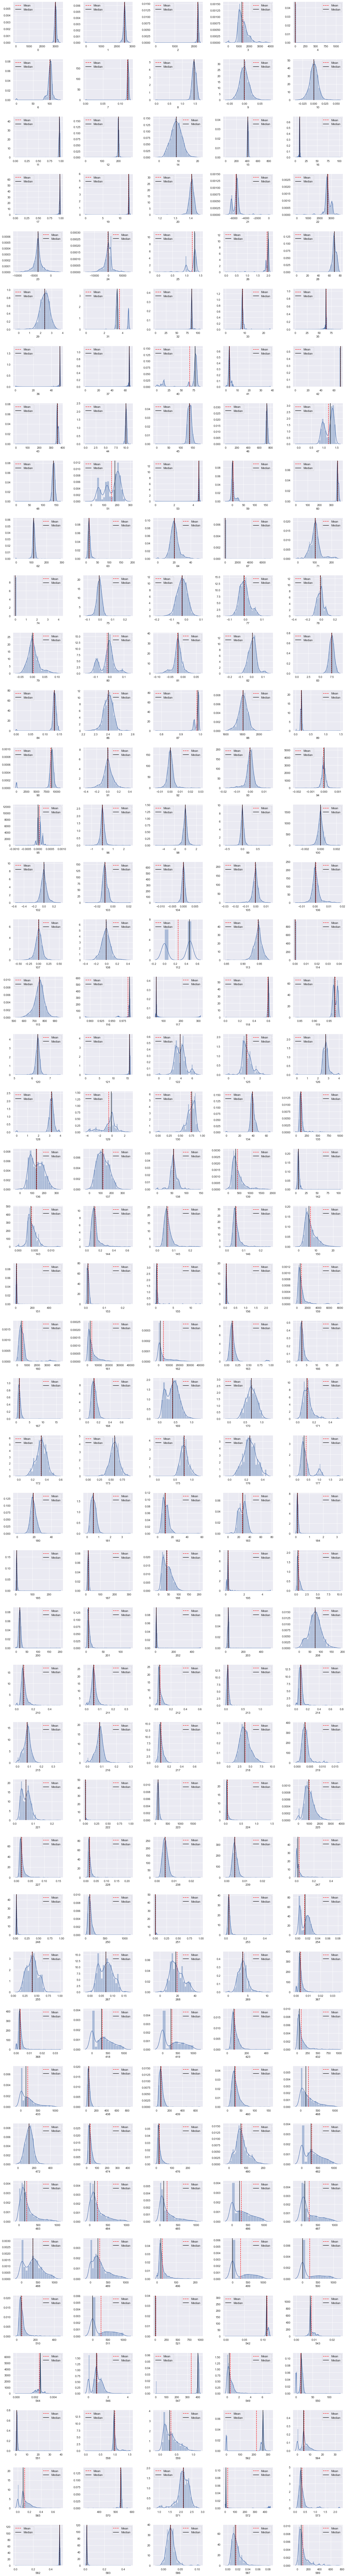

In [419]:
#Univariate Visualization

graph = sig_df.copy()

graph.drop('Pass/Fail',axis = 1, inplace = True)
f = []
for cols in graph:
    f.append(cols)
# print(len(f))
      
fig, ax = plt.subplots(nrows = 45, ncols = 5, figsize = [23, 173])
# fig.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for f, ax in zip(f, ax.flatten()):
    sns.distplot(graph[f], ax = ax)
    mean = graph[f].mean()
    median = graph[f].median()
    ax.axvline(mean, color='red', linestyle='--')
    ax.axvline(median, color='black', linestyle='-')
    ax.legend({'Mean':mean, 'Median':median})

   - As seen from the above univariate graphs, almost all the columns are fairly normally distributed. 
   - There are also coluumns which have more than one peaks in the distribution meaning that those are bimodal distributionn. The two peaks in a bimodal distribution also represent two local maximums; where the data points stop increasing and start decreasing.
   - There are features which are right skewed and also there are features with left skew.
   - Removing the outliers of these highly skewed features may affect the nature of distribution.

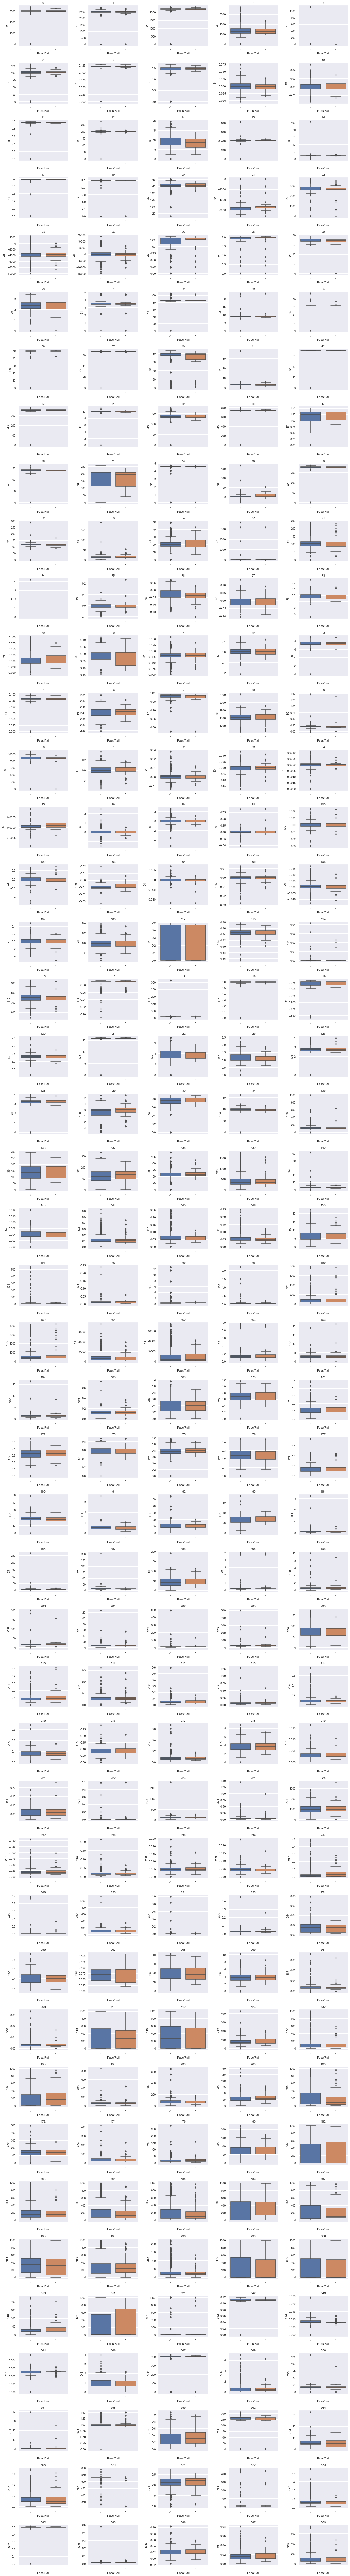

In [420]:
#Bivariate Visualization
#Distribution of independent features with respect to target column

f = []
graph = sig_df.copy()

graph.drop('Pass/Fail',axis = 1, inplace = True)
f = []
for cols in graph:
    f.append(cols)
# print(len(f))
      
fig, ax = plt.subplots(nrows = 45, ncols = 5, figsize = [23, 173])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for f, ax in zip(f, ax.flatten()):
    sns.boxplot( x= 'Pass/Fail', y  = f, data = sig_df, ax =ax)
    ax.set_title(f)

  - There are many outliers in postive as well as negative side of almost many features. 
  - Also, there are features have two extreme values.
  - Treating the positive outliers will affect the nature of the distribution.
  - Also, removing the outliers of these highly skewed features may affect the nature of distribution.

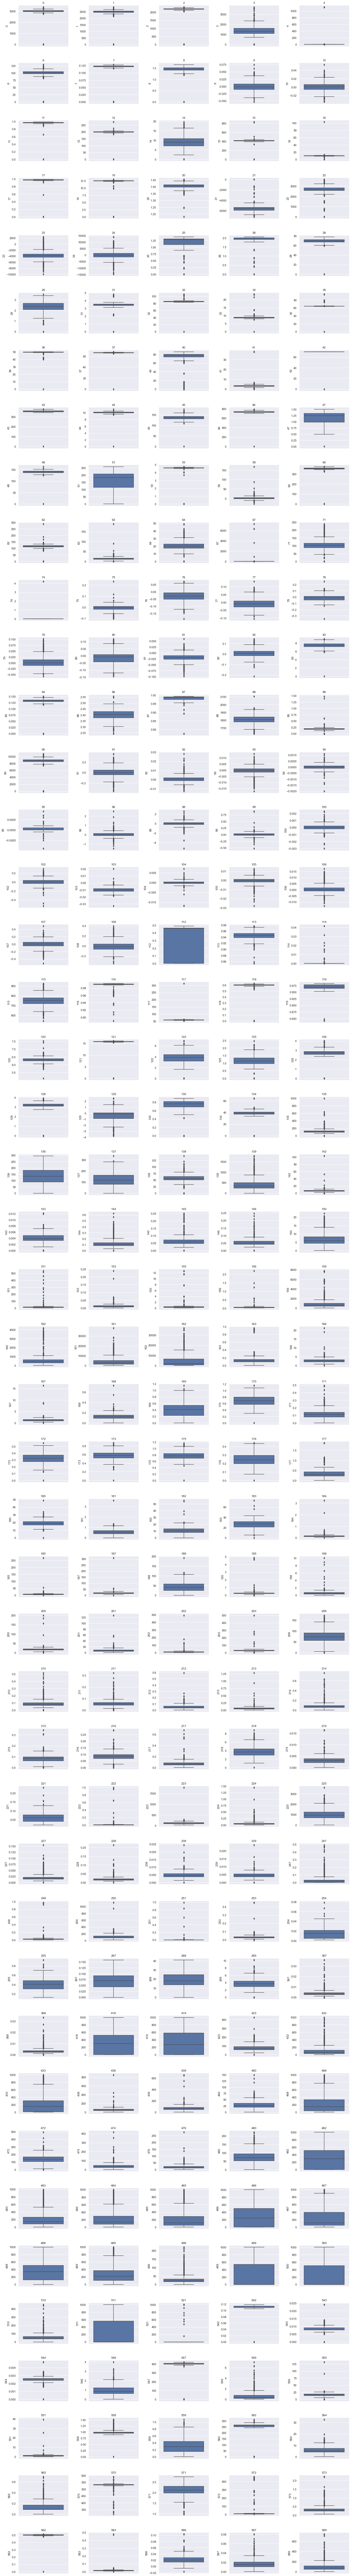

In [421]:
graph = sig_df.copy()

graph.drop('Pass/Fail',axis = 1, inplace = True)
f = []
for cols in graph:
    f.append(cols)
# print(len(f))
      
fig, ax = plt.subplots(nrows = 45, ncols = 5, figsize = [23, 173])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for f, ax in zip(f, ax.flatten()):
    sns.boxplot(graph[f], ax =ax, orient = 'v')
    ax.set_title(f)

 - Here, every feature has a different range of input values.
 - Almost many features have outliers on both the sides: positve as well as negative.

## Data pre- processing

#### Segregating the predictors and target attribute

In [422]:
x = sig_df.drop(['Pass/Fail'],axis=1)
y = sig_df['Pass/Fail']

#### Checking for target balancing and fixing it if found imbalanced.

In [423]:
pass_ct = sig_df[sig_df['Pass/Fail'] == -1]
pass_ct.shape

(1463, 226)

In [424]:
fail_ct = sig_df[sig_df['Pass/Fail'] == 1]
fail_ct.shape

(104, 226)

In [425]:
tot_target_rows = len(sig_df[sig_df['Pass/Fail'] == -1]) + len(sig_df[sig_df['Pass/Fail'] == 1])

In [426]:
pass_percent = len(sig_df[sig_df['Pass/Fail'] == -1])/tot_target_rows
print("Percentage of Pass(-1) : {0:0.2f}% ".format((pass_percent) * 100))
fail_percent = len(sig_df[sig_df['Pass/Fail'] == 1])/tot_target_rows
print("Percentage of Fail(1) : {0:0.2f}% ".format((fail_percent) * 100))


# ("{0:0.2f}% data is in test set".format((len(X_test)/len(pd_df.index)) * 100))

Percentage of Pass(-1) : 93.36% 
Percentage of Fail(1) : 6.64% 


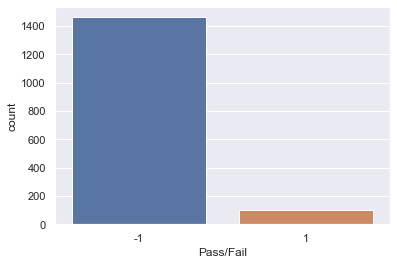

In [427]:
sns.countplot(x='Pass/Fail', data = sig_df)

In [428]:
ros = RandomOverSampler()                     #Fixing the imbalance of the target variable

# fit predictor and target variable
x_ros, y_ros = ros.fit_sample(x, y)

In [429]:
new_bal_df = pd.concat([x_ros,y_ros], axis=1)                   #Concating the balanced target variabl

In [430]:
new_bal_df.shape

(2926, 226)

In [431]:
new_bal_df['Pass/Fail'].value_counts()

 1    1463
-1    1463
Name: Pass/Fail, dtype: int64

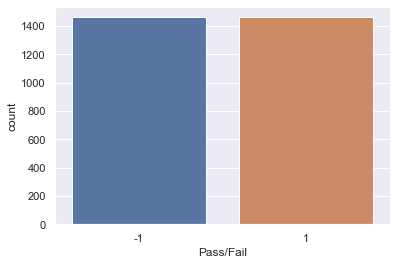

In [432]:
sns.countplot(x='Pass/Fail', data = new_bal_df)

#### Performing train-test split and standardizing the data.

In [433]:
new_x = new_bal_df.drop(['Pass/Fail'],axis=1)
new_y = new_bal_df['Pass/Fail']

In [434]:
scaler = StandardScaler().fit(new_x)
X = scaler.transform(new_x)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, train_size=0.7, test_size=0.3, random_state=40)

In [436]:
# print(len(X_train)),print(len(X_test))

In [437]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(new_bal_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(new_bal_df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


#### Checking if the train and test data have similar statistical characteristics when compared with original data.

In [438]:
train,test = train_test_split(new_bal_df, test_size=0.30, random_state=0)

In [439]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [440]:
train = pd.read_csv('train.csv',low_memory=True)
test = pd.read_csv('test.csv',low_memory=True)

In [441]:
test['is_train'] = 0
train['is_train'] = 1 

In [442]:
#combining test and train data
combined_df = pd.concat([train, test], axis=0, ignore_index=True)
combined_df.head()

0        1          2          3       4         6       7       8  \
0  3181.59  2512.77  2171.8556  1156.6018  1.4025  100.1367  0.1243  1.4496   
1  2957.97  2483.97  2243.7778  1502.9221  1.8160  102.0978  0.1195  1.4420   
2  2954.36  2559.27  2238.5444  1659.1424  0.9010   99.3100  0.1204  1.4086   
3  2994.05  2548.21  2195.1222  1046.1468  1.3204  103.3400  0.1223  1.5144   
4  3244.74  2422.00  2208.5222  1838.7054  1.1571   95.2056  0.1249  1.5575   

        9      10      11        12       14        15       16      17  \
0  0.0022  0.0008  0.9544  202.1452   9.1265  412.6262   9.9153  0.9685   
1  0.0183  0.0023  0.9569  202.0149   9.5590  422.7669   9.8972  0.9650   
2 -0.0087 -0.0014  0.9458  199.7549  10.4274  414.8210  10.2399  0.9660   
3 -0.0190  0.0013  0.9433  201.7125  11.8566  411.9572  10.2918  0.9664   
4  0.0049 -0.0207  0.9762  197.8988   9.1637  421.2350   9.9621  0.9809   

        19      20       21       22      23      24      25      26       28  \
0  12.4694  1.4101 -5333.00  2712.75 -3369.5  2314.5  1.3352  1.9832  68.0778   
1  12.4786  1.3962 -6267.75  3006.50 -4335.0  1503.0  0.9952  1.8830  70.1222   
2  12.4896  1.3839 -6383.75  3064.25 -2435.5  1501.0  0.9772  1.8925  67.4667   
3  12.4663  1.4195 -2727.50  1400.00 -1976.0   360.5  0.4550  0.8847  68.7111   
4  12.5600  1.3831 -5477.00  2657.75 -2494.5   187.5  1.3185  1.9670  72.2333   

       29      31       32      33       35       36       37     40     41  \
0  1.2667  3.4367  86.9432  8.8105  64.0283  49.3914  66.3620  80.84  3.590   
1  2.2889  4.6379  84.3575  8.5310  64.2467  49.5663  66.3319  77.59  3.893   
2  2.4444  4.6397  85.6608  9.5713  64.1016  49.6001  66.4370  64.39  2.501   
3  1.9444  3.5029  84.7569  8.6590  64.1114  49.8470  65.8389  14.37  5.434   
4  2.5222  3.3312  85.2917  8.9132  63.7658  49.8362  66.2465  80.33  2.544   

     42        43       44        45        46      47        48        51  \
0  70.0  350.8564   9.9454  147.0718  742.7585  1.2722  135.6436  206.2687   
1  70.0  351.8664  10.1955  129.3127  719.8077  1.0777  138.2282   50.2306   
2  70.0  348.6818   9.9649  132.8773  717.3040  1.0373  137.0736   48.9119   
3  70.0  366.1545  10.3250  120.2818  723.2513  0.9543  138.1345  113.0565   
4  70.0  350.6245  10.2090  136.5145  731.2121  0.9429  140.6100  104.4575   

      53       59        60        62       63       64      67        71  \
0  4.619  -5.7091  353.9227  121.3627  17.1627  25.7091  0.8529  108.1260   
1  4.655  12.1818  350.7245  101.4945  12.0333  27.8182  1.3555  125.1848   
2  4.584   8.0955  347.3954  120.9727   4.4283  11.9045  1.0383  106.6977   
3  4.647  27.8373  364.8900  108.1191   7.8579  12.1627  0.8692  112.0789   
4  4.591   1.0027  352.6027  117.5173  13.4251  18.9973  0.8223  233.6113   

    74      75      76      77      78      79      80      81      82  \
0  0.0  0.0852 -0.0189 -0.0297  0.0869 -0.0224  0.0073 -0.0681  0.0207   
1  0.0  0.0395 -0.0320  0.0437 -0.0603  0.0365 -0.0836  0.0108 -0.0470   
2  0.0  0.0073 -0.0713  0.0223 -0.0525  0.0751 -0.0118 -0.0291 -0.0153   
3  0.0  0.0035 -0.0530  0.0003 -0.0411 -0.0002 -0.0996  0.0011  0.0356   
4  0.0 -0.0184 -0.0469 -0.0320 -0.0001 -0.0012 -0.0441 -0.0664  0.0329   

       83      84      86      87         88      89         90      91  \
0  8.1196  0.1378  2.3718  0.9926  1795.2230  0.1602  8952.2602  0.0162   
1  6.8890  0.1349  2.4222  0.9870  1778.8166  0.1631  8321.2800  0.0075   
2  8.4215  0.1283  2.4128  0.9849  1763.6142  0.1938  8701.1101  0.0515   
3  7.4902  0.1355  2.4532  0.9883  1732.2002  0.1669  8476.1700  0.0420   
4  7.9434  0.1378  2.3718  0.9918  1767.0592  0.1834  8974.0602  0.0636   

       92      93      94      95      96      98      99     100     102  \
0 -0.0015  0.0004  0.0001  0.0000 -0.1792 -0.0755 -0.0781  0.0007 -0.0597   
1 -0.0023  0.0042 -0.0001  0.0000  0.1791 -0.3287 -0.0605  0.0000 -0.0254   
2 -0.0005  0.0007  0.0001  0.0000 -0.0938  0.1275  0.1535  0.0

In [443]:
#dropping ‘in_train’ column as it is not present in the test
combined_df = combined_df.drop(['Pass/Fail'], axis =1)
y_val = combined_df['is_train'].values                       #labels
x_val = combined_df.drop('is_train', axis=1).values          #covariates or our independent variables
tst, trn = test.values, train.values

In [444]:
m = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y_val.shape) #creating an empty prediction array

In [445]:
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x_val, y_val)):
    X_train_c, X_test_c = x_val[train_idx], x_val[test_idx]
    y_train_c, y_test_c = y_val[train_idx], y_val[test_idx]
 
    m.fit(X_train_c, y_train_c)
    probs = m.predict_proba(X_test_c)[:, 1] #calculating the probability
    predictions[test_idx] = probs

In [446]:
print('ROC-AUC for train and test distributions:', roc_auc_score(y_val, predictions))

ROC-AUC for train and test distributions: 0.5151614664898918


AUC value of less than 0.5 implies that there is no evidence of strong covariate shift. This means that majority of the observations comes from a feature space which is not specific to test or train. 
Covariate shift refers to the change in the distribution of the input variables present in the training and the test data. It is the most common type of shift and it is now gaining more attention as nearly every real-world dataset suffers from this problem

In [447]:
org_df.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000   
mean    100.0   101.112908     0.121822     1.462862    -0.000841   
std       0.0     6.237214     0.008961     0.073897     0.015116   
min     100.0    82.131100     0.000000     1.191000    -0.053400   
25%     100.0    97.920000     0.121100     1.411200    -0.010800   
50%     100.0   101.512200     0.122400     1.461600    -0.001300   
75%     100.0   104.586700     0.123800     1.516900     0.008400   
max     100.0   129.252200     0.128600     1.656400     0.074900   

                10           11           12      13           14  \
count  1565.000000  1565.000000  1565.000000  1564.0  1564.000000   
mean      0.000146     0.964353   199.956809     0.0     9.005371   
std       0.009302     0.012452     3.257276     0.0     2.796596   
min      -0.034900     0.655400   182.094000     0.0     2.249300   
25%      -0.005600     0.958100   198.130700     0.0     7.094875   
50%       0.000400     0.965800   199.535600     0.0     8.967000   
75%       0.005900     0.971300   202.007100     0.0    10.861875   
max       0.053000     0.984800   272.045100     0.0    19.546500   

                15           16           17           18           19  \
count  1564.000000  1564.000000  1564.000000  1564.000000  1557.000000   
mean    413.086035     9.907603     0.971444   190.047354    12.481034   
std      17.221095     2.403867     0.012062     2.781041     0.217965   
min     333.448600     4.469600     0.579400   169.177400     9.877300   
25%     406.127400     9.567625     0.968200   188.299825    12.460000   
50%     412.219100     9.851750     0.972600   189.664200    12.499600   
75%     419.089275    10.128175     0.976800   192.189375    12.547100   
max     824.927100   102.867700     0.984800   215.597700    12.989800   

                20           21           22           23            24  \
count  1567.000000  1565.000000  1565.000000  1565.000000   1565.000000   
mean      1.405054 -5618.393610  2699.378435 -3806.299734   -298.598136   
std       0.016737   626.822178   295.498535  1380.162148   2902.690117   
min       1.179700 -7150.250000     0.000000 -9986.750000 -14804.500000   
25%       1.396500 -5933.250000  2578.000000 -4371.750000  -1476.000000   
50%       1.406000 -5523.250000  2664.000000 -3820.750000    -78.750000   
75%       1.415000 -5356.250000  2841.750000 -3352.750000   1377.250000   
max       1.453400     0.000000  3656.250000  2363.000000  14106.000000   

                25           26           27           28           29  \
count  1565.000000  1565.000000  1565.000000  1565.000000  1565.000000   
mean      1.203845     1.938477     6.638628    69.499532     2.366197   
std       0.177600     0.189495     1.244249     3.461181     0.408694   
min       0.000000     0.000000     0.000000    59.400000     0.666700   
25%       1.094800     1.906500     5.263700    67.377800     2.088900   
50%       1.283000     1.986500     7.264700    69.155600     2.377800   
75%       1.304300     2.003200     7.329700    72.266700     2.655600   
max       1.382800     2.052800     7.658800    77.900000     3.511100   

                30           31           32           33           34  \
count  1565.000000  15

In [448]:
combined_df.describe()

0            1            2            3            4  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean   3005.775977  2482.102925  2188.898174  1371.379329     2.838028   
std     158.913607   198.766064   154.580649   403.117156    41.076748   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    2955.452500  2456.582500  2177.322200  1081.822175     1.030400   
50%    3000.300000  2499.720000  2197.644400  1285.214400     1.315900   
75%    3054.340000  2533.910000  2216.500000  1593.122000     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    100.667610     0.121709     1.464902    -0.001412     0.000390   
std       8.914520     0.009496     0.078030     0.014356     0.009527   
min       0.000000     0.000000     0.000000    -0.053400    -0.034900   
25%      98.322200     0.121100     1.419200    -0.009800    -0.005500   
50%     101.433300     0.122300     1.467200    -0.001200     0.001200   
75%     104.161975     0.123800     1.513400     0.007000     0.006400   
max     129.252200     0.128600     1.656400     0.074900     0.053000   

                11           12           14          15           16  \
count  2926.000000  2926.000000  2926.000000  2926.00000  2926.000000   
mean      0.962864   199.797971     8.660514   412.43326     9.906574   
std       0.027643     6.041646     2.795713    18.93830     1.828548   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.956100   198.195100     6.599900   406.71010     9.588850   
50%       0.964900   199.678400     8.839800   412.31600     9.891300   
75%       0.970900   201.989000    10.661475   418.50765    10.167350   
max       0.984800   272.045100    19.546500   824.92710   102.867700   

                17           19           20           21           22  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean      0.970244    12.424558     1.405653 -5473.888585  2646.627905   
std       0.032670     0.936084     0.015820   876.799262   415.637976   
min       0.000000     0.000000     1.179700 -7150.250000     0.000000   
25%       0.967300    12.461600     1.396900 -5748.312500  2573.500000   
50%       0.972000    12.499200     1.406650 -5475.500000  2650.875000   
75%       0.977100    12.548000     1.415800 -5310.625000  2785.437500   
max       0.984800    12.989800     1.453400     0.000000  3656.250000   

                23            24           25           26           28  \
count  2926.000000   2926.000000  2926.000000  2926.000000  2926.000000   
mean  -3756.227700   -375.608764     1.187781     1.904915    68.655634   
std    1401.496992   2647.377706     0.229385     0.295367     5.257820   
min   -9986.750000 -14804.500000     0.000000     0.000000     0.000000   
25%   -4364.000000  -1462.500000     1.245500     1.948300    66.888900   
50%   -3810.250000    -57.375000     1.281700     1.987500    68.711100   
75%   -3273.750000   1331.125000     1.304000     2.002300    71.066700   
max    2363.000000  14106.000000     1.382800     2.052800    77.900000   

                29           31           32           33           35  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean      2.362518     3.611842    85.476833     9.129833    64.466959   
std       0.421345     0.533019     2.917509     1.885194     2.519129   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.066700     3.369100    84.574300     8.616450    64.014500   
50%       2.377800     3.429400    85.188000     8.804300    64.161500   
75%       2.644400     3.520850    85.737500     9.163800    64.294900   
max       3.511100     4.804400   105.603800    23.345300    94.264100   

               

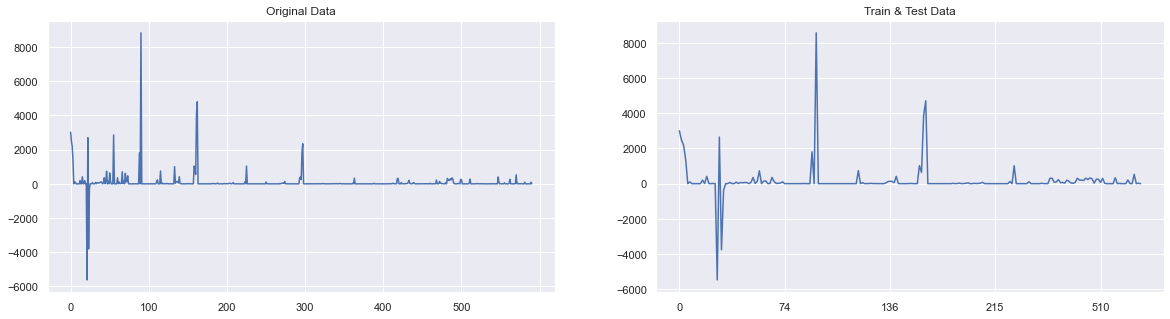

In [449]:
#Plotting the mean of both the data

plt.subplot(1,2,1)
org_df.mean().plot(figsize=(20,5), title = 'Original Data')
plt.subplot(1,2,2)
combined_df.iloc[:,:220].mean().plot(figsize=(20,5), title = 'Train & Test Data')
plt.show()

No significant difference in the mean values of both the original as well as Train-Test data.

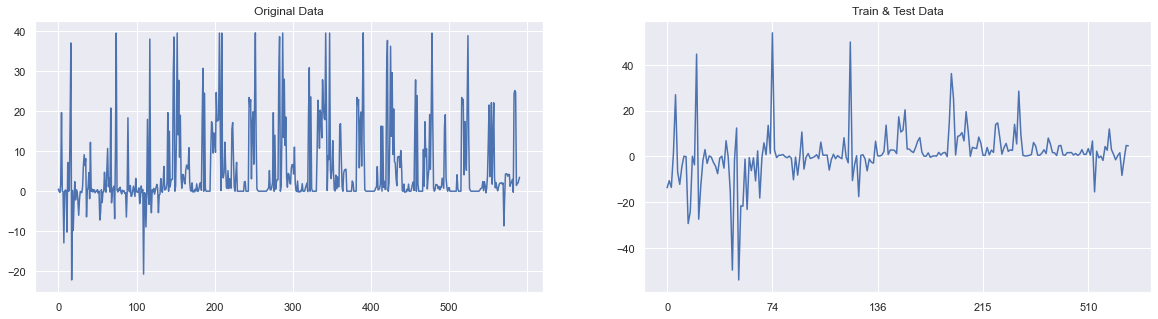

In [450]:
# plotting the skewness of both the data

plt.subplot(1,2,1)
org_df.skew().plot(figsize=(10,5), title = 'Original Data')
plt.subplot(1,2,2)
combined_df.iloc[:,:220].skew().plot(figsize=(20,5), title = 'Train & Test Data')
plt.show()

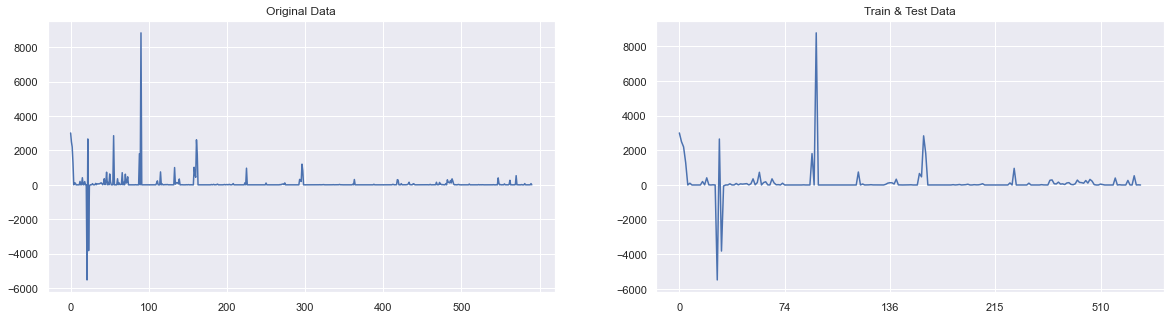

In [451]:
#Plotting the median of both the data

plt.subplot(1,2,1)
org_df.median().plot(figsize=(10,5), title = 'Original Data')
plt.subplot(1,2,2)
combined_df.iloc[:,:220].median().plot(figsize=(20,5), title = 'Train & Test Data')
plt.show()

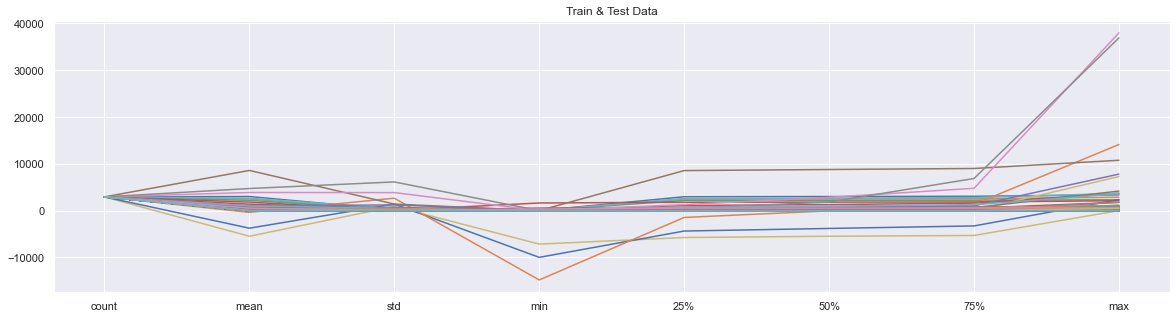

In [452]:
# Plotting the descriptive statistic of the train and tets data

combined_df.iloc[:,:220].describe().plot(figsize=(20,5), title = 'Train & Test Data', legend = None)
plt.show()

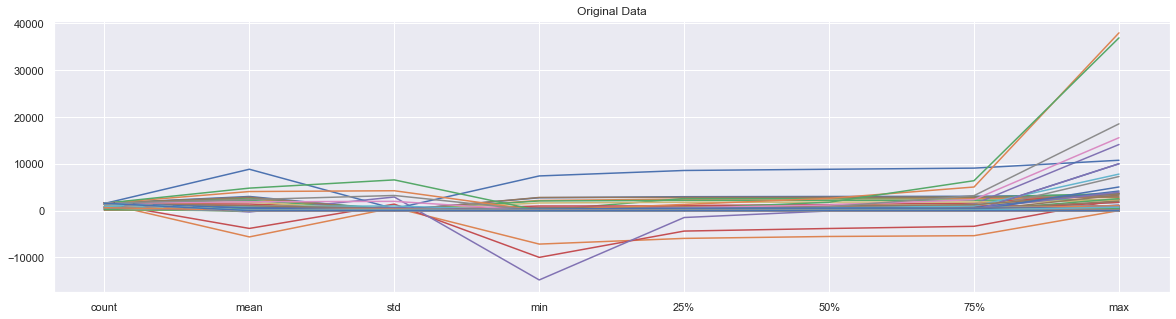

In [453]:
#Plotting the descriptive statistics of the original dataset

org_df.describe().plot(figsize=(20,5), title = 'Original Data', legend= None)
plt.show()

### Model training, testing and tuning

#### Logistic Regression Model

In [456]:
# Fitting the logistic model on training set

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)

In [457]:
print('Accuracy of logistic regression classifier on training set: {:.2f}%'.format(logistic_model.score(X_train, y_train)*100))
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logistic_model.score(X_test,y_test)*100))

Accuracy of logistic regression classifier on training set: 95.70%
Accuracy of logistic regression classifier on test set: 90.32%


#### Using Cross Validation Techniques

In [458]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results_kfold = cross_val_score(model, X, new_y, cv=kfold)
print(results_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_kfold.mean()*100.0, results_kfold.std()*100.0))

[0.47610922 0.65982906 0.77094017 0.89059829 0.92307692]
Accuracy: 74.411% (16.318%)


In [459]:
# prepare cross validation

loocv = LeaveOneOut()
loocv.get_n_splits(X)

results_loocv = model_selection.cross_val_score(model, X, new_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results_loocv.mean()*100.0, results_loocv.std()*100.0))

Accuracy: 90.396% (29.464%)


#### Hyper-parameter tuning techniques to get the best accuracy

In [460]:
# Creating the hyperparameter grid  

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)


random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring='accuracy',error_score=0, iid=True)

random_result = random.fit(X, new_y)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_*100, random_result.best_params_))

Best: 82.057416 using {'max_iter': 100, 'dual': False, 'C': 2.5}


####  Using PCA to enhance the model performance.

In [461]:
#Calculating covariance matrix

cov_matrix = np.cov(X.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (225, 225)
Covariance_matrix [[ 1.00034188 -0.03449027  0.01270378 ...  0.01991348 -0.00748951
   0.00792904]
 [-0.03449027  1.00034188 -0.02887978 ...  0.03616022  0.07692004
   0.06126906]
 [ 0.01270378 -0.02887978  1.00034188 ...  0.0039131  -0.01553627
  -0.03572181]
 ...
 [ 0.01991348  0.03616022  0.0039131  ...  1.00034188  0.21835304
  -0.50770564]
 [-0.00748951  0.07692004 -0.01553627 ...  0.21835304  1.00034188
   0.36118662]
 [ 0.00792904  0.06126906 -0.03572181 ... -0.50770564  0.36118662
   1.00034188]]


In [462]:
#Calculating Eigen Vectors & Eigen Values
pca=PCA()
pca.fit(X)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.05096322 -0.00045007 -0.01308124 ... -0.00206783 -0.00077455
  -0.00064523]
 [-0.01227338 -0.01039763 -0.02783416 ...  0.02282767 -0.04785791
  -0.00554267]
 [-0.03625659 -0.00208941  0.00800276 ... -0.04650495 -0.00892753
  -0.00480279]
 ...
 [ 0.0340409   0.0269703  -0.05085615 ...  0.13604523 -0.16015336
   0.09702024]
 [-0.04487088  0.01600357 -0.04104957 ... -0.11702437  0.12565113
  -0.07028229]
 [-0.04990122 -0.00909438  0.0182223  ...  0.12199771 -0.1559058
   0.10317257]]

 Eigen Values 
%s [9.07220148e+00 7.92906818e+00 6.15453475e+00 4.94828531e+00
 4.78927943e+00 4.53758077e+00 4.21056896e+00 3.98222896e+00
 3.90685664e+00 3.84204995e+00 3.69709441e+00 3.50214208e+00
 3.38441318e+00 3.26956094e+00 3.17199915e+00 3.06243333e+00
 2.90620496e+00 2.83521020e+00 2.77892189e+00 2.65938329e+00
 2.53661759e+00 2.55997113e+00 2.45419079e+00 2.37312045e+00
 2.30620797e+00 2.31518315e+00 2.23743286e+00 2.18178555e+00
 2.13956992e+00 2.09951411e+00 2.06782578e+00

In [463]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.072201475356348, array([ 5.09632176e-02, -1.22733802e-02, -3.62565851e-02,  3.62936454e-02,
        1.31700548e-02, -6.02506549e-02, -2.14770657e-02, -3.41802328e-02,
        3.68285086e-02, -2.86573588e-02,  3.60080039e-02,  1.69182599e-04,
        2.77212549e-02, -3.60935203e-03, -8.76252181e-03,  2.05221044e-02,
        2.07115627e-02,  2.37730717e-03, -1.34682661e-01,  1.29302246e-01,
       -8.05889622e-02, -3.84767429e-02,  2.46379441e-01,  2.17759789e-01,
        1.65836725e-01, -8.00173971e-02, -6.23980780e-02, -2.54343464e-02,
       -5.04522570e-02, -1.68860853e-02,  7.31525826e-03, -2.12818281e-02,
        6.86674639e-02, -4.60535549e-02,  3.08950643e-03, -2.24241513e-02,
        4.11630407e-02,  2.11803168e-02,  8.18753547e-03,  2.43285669e-02,
        7.60730513e-04, -3.16661834e-03, -1.62213815e-02, -1.69329135e-01,
       -1.71820421e-02,  3.17295916e-02, -8.38692922e-02, -7.87807824e-02,
       -4.59439106e-02,  8.32765286e-02,  7.32634010e-03,  1.00047370e-01,
    

In [464]:
k = 1
total = []
for i in pca.explained_variance_ratio_*100:
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k+=1
    total.append(i)
print('\nTotal variance explained by all the principle components:',sum(total),'%')
n=len(total)


Variance explained by Principle Component 1 is : 4.03%
Variance explained by Principle Component 2 is : 3.52%
Variance explained by Principle Component 3 is : 2.73%
Variance explained by Principle Component 4 is : 2.20%
Variance explained by Principle Component 5 is : 2.13%
Variance explained by Principle Component 6 is : 2.02%
Variance explained by Principle Component 7 is : 1.87%
Variance explained by Principle Component 8 is : 1.77%
Variance explained by Principle Component 9 is : 1.74%
Variance explained by Principle Component 10 is : 1.71%
Variance explained by Principle Component 11 is : 1.64%
Variance explained by Principle Component 12 is : 1.56%
Variance explained by Principle Component 13 is : 1.50%
Variance explained by Principle Component 14 is : 1.45%
Variance explained by Principle Component 15 is : 1.41%
Variance explained by Principle Component 16 is : 1.36%
Variance explained by Principle Component 17 is : 1.29%
Variance explained by Principle Component 18 is : 1.26%
V

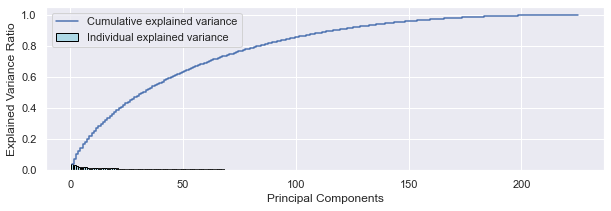

In [465]:
plt.figure(figsize=(10 ,3))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, label = 'Individual explained variance',color='lightblue',edgecolor='black')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

In [466]:
#Dimensionality Reduction

P_reduce = np.array(eigvectors_sorted[0:160])   

X_D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_D)  # converting array to dataframe for pairplot

# reduced_pca

In [467]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca, new_y, train_size=0.7, test_size=0.3, random_state=42)

In [468]:
# Now fit the model on pca data with new dimension
# Fitting the logistic model on training set

logistic_model1 = LogisticRegression(max_iter = 100, dual = False, C = 2.5)
logistic_model1.fit(pca_X_train,pca_y_train)


LogisticRegression(C=2.5)

In [469]:
pca_y_predict = logistic_model1.predict(pca_X_test)

In [470]:
print("Model Score On Reduced PCA Dimension Train set: {:.2f}% ".format(logistic_model1.score(pca_X_train, pca_y_train)*100))
print("Model Score On Reduced PCA Dimension Test set: {:.2f}% ".format(logistic_model1.score(pca_X_test, pca_y_test)*100))

Model Score On Reduced PCA Dimension Train set: 90.09% 
Model Score On Reduced PCA Dimension Test set: 86.90% 


In [471]:
current_acc= []

train_acc = []
test_acc = []

train_acc.append(logistic_model1.score(pca_X_train, pca_y_train))
test_acc.append(logistic_model1.score(pca_X_test, pca_y_test))

current_acc.append(logistic_model1.score(pca_X_train, pca_y_train))
current_acc.append(logistic_model1.score(pca_X_test, pca_y_test))
current_acc

[0.90087890625, 0.8690205011389521]

In [472]:
num_folds = 50
seed = 7

kfold_model1 = KFold(n_splits=num_folds, random_state=seed)

results_kf1 = cross_val_score(model, reduced_pca, new_y, cv=kfold_model1)
print(results_kf1)
print("Accuracy: %.2f%% (%.2f%%)" % (results_kf1.mean()*100.0, results_kf1.std()*100.0))

[0.54237288 0.6440678  0.50847458 0.42372881 0.83050847 0.79661017
 0.66101695 0.76271186 0.88135593 0.74576271 0.86440678 0.83050847
 0.93220339 0.76271186 0.77966102 0.72881356 0.93220339 0.88135593
 0.86440678 0.76271186 0.69491525 0.74576271 0.94915254 0.88135593
 0.91525424 0.89830508 0.94827586 0.9137931  0.87931034 0.96551724
 0.89655172 0.94827586 0.9137931  0.9137931  0.93103448 0.98275862
 0.93103448 0.9137931  0.94827586 0.9137931  0.98275862 0.94827586
 0.89655172 0.98275862 0.9137931  0.94827586 0.94827586 0.89655172
 0.84482759 0.9137931 ]
Accuracy: 84.99% (12.41%)


#### Displaying the classification report of before and after enhancement

In [473]:
print("Classification Report on Original Data:\n---------------------------------------\n",classification_report(y_test,y_pred_lr))
print("Classification Report on Reduced Dimensions:\n--------------------------------------------\n",classification_report(pca_y_test,pca_y_predict))

Classification Report on Original Data:
---------------------------------------
               precision    recall  f1-score   support

          -1       1.00      0.81      0.90       455
           1       0.83      1.00      0.91       423

    accuracy                           0.90       878
   macro avg       0.92      0.91      0.90       878
weighted avg       0.92      0.90      0.90       878

Classification Report on Reduced Dimensions:
--------------------------------------------
               precision    recall  f1-score   support

          -1       0.93      0.81      0.86       449
           1       0.82      0.93      0.87       429

    accuracy                           0.87       878
   macro avg       0.87      0.87      0.87       878
weighted avg       0.88      0.87      0.87       878



Insights On Classification Reports:

- Before enhancement:
Our model has a 100% precision score when it comes to classifying if pass result for in house line testing. It has 83% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 81% for Pass classification and 100% for Fail classification. Our model has a weighted average of 90 % for all classification metrics.

- After enhancement:
Our model has a 93% precision score when it comes to classifying if pass result for in house line testing. It has 82% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 81% for Pass classification and 93% for Fail classification. Our model has a weighted average of 86% for all classification metrics.


#### Method to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies
 - Method steps are as follow:-
    - Step 1: Creating a new sample from the cleaned dataset
    - Step 2: Splitting the new sample into train and test test
    - Step 3: Finding the train & tets accuracies of the new sample
    - Step 4: Pipeline for scaling & fitting the model to the new sample
    - Step 5: Applying hypothesis testing (t-test) to prove statistically if the train & test accuracies changes or not.
    
 #####   (Step 1 to Step 3 are built using user defined functions)

In [474]:
# Creating a new sample with 200 rows

def SampleNDrop(df):
    global sample_df
    sample_df = df.sample(n = 200)
#     sample2_df = sig_df.sample(n =100)
    x_diff = sample_df.drop(['Pass/Fail'],axis=1)
    y_diff = sample_df['Pass/Fail']

    return x_diff,y_diff
    

x_diff_n, y_diff_n = SampleNDrop(sig_df)

In [475]:
#Creating a user defined function to split the new sample

def SplitTrainTest(par_X,par_y):
#     tr_size = 0.7
#     test_size = 0.3
#     rs = 40
    X_train_,X_test_,y_train_,y_test_ = train_test_split(par_X,par_y,train_size=0.7, test_size=0.3, random_state=40)
    return X_train_,X_test_,y_train_,y_test_
        
X_train_d,X_test_d,y_train_d,y_test_d = SplitTrainTest(x_diff_n, y_diff_n)

In [476]:
#Creating a user defined function to find the train and test accuracies of the new sample

def FindAccuracy(tr_x,tr_y,ts_x,ts_y):
    achieved_score = []

    achieved_score.append(pipe.score(tr_x,tr_y))
    achieved_score.append(pipe.score(ts_x,ts_y))
    
    return achieved_score


In [477]:
pipe = make_pipeline(StandardScaler(), (LogisticRegression(max_iter=110, dual=False, C= 2.5))) 
# print(" Pipeline steps:\ n{}". format( pipe.steps))


In [478]:
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=2.5, max_iter=110))])

In [479]:
# Statistically proving the above

Ho = "No change in the achieved accuracy"                #Stating the Null Hypothesis
Ha = "There is a change in the achieved accuracy"        #Stating the Alternate Hypothesis

x = current_acc                                          #achieved trained & test accuracies
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  #new samples train & test accuracies

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

# print('{:.2f}'.format(p_value))

if p_value < 0.05:                                       #Setting our significance level at 5% --> alpha
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No change in the achieved accuracy as the p_value (0.255) > 0.05


#### K Nearest Neighbor Model

In [480]:
NNH = KNeighborsClassifier()  
NNH.fit(X_train, y_train)
y_pred_knn = NNH.predict(X_test)

In [481]:
print('Accuracy of K Neighbours Classifier on training set: {:.2f}%'.format(NNH.score(X_train, y_train)*100))
print('Accuracy of K Neighbours Classifier on test set: {:.2f}%'.format(NNH.score(X_test, y_test)*100))

Accuracy of K Neighbours Classifier on training set: 93.55%
Accuracy of K Neighbours Classifier on test set: 88.72%


In [482]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

results1_kfold = cross_val_score(NNH, X, new_y, cv=kfold)
print(results1_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results1_kfold.mean()*100.0, results1_kfold.std()*100.0))

[0.4556314  0.66495726 0.74017094 1.         0.97948718]
Accuracy: 76.805% (20.372%)


In [483]:
# prepare cross validation

loocv = LeaveOneOut()
loocv.get_n_splits(X)

results1_loocv = model_selection.cross_val_score(NNH, X, new_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results1_loocv.mean()*100.0, results1_loocv.std()*100.0))

Accuracy: 92.105% (26.966%)


In [484]:
# Creating the hyperparameter grid  

param_grid = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]


random = RandomizedSearchCV(estimator=NNH, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring='accuracy',error_score=0, iid=True)

random_result1 = random.fit(X, new_y)

# Summarize results
print("Best: %f using %s" % (random_result1.best_score_*100, random_result1.best_params_))

Best: 91.285031 using {'weights': 'uniform', 'n_neighbors': 2}


In [485]:
NNH = KNeighborsClassifier(weights='uniform', n_neighbors=2) 
NNH.fit(X_train, y_train)
y_pred_knn_enh = NNH.predict(X_test)

In [486]:
print('Accuracy of K Neighbours Classifier on training set: {:.2f}%'.format(NNH.score(X_train, y_train)*100))
print('Accuracy of K Neighbours Classifier on test set: {:.2f}%'.format(NNH.score(X_test, y_test)*100))

Accuracy of K Neighbours Classifier on training set: 100.00%
Accuracy of K Neighbours Classifier on test set: 96.58%


In [487]:
current_acc= []


train_acc.append(NNH.score(X_train, y_train))
test_acc.append(NNH.score(X_test, y_test))

current_acc.append(NNH.score(X_train, y_train))
current_acc.append(NNH.score(X_test, y_test))
current_acc

[1.0, 0.9658314350797267]

In [488]:
print("Classification Report on Original Model:\n---------------------------------------\n",classification_report(y_test,y_pred_knn))
print("Classification Report on Enhanched Model:\n---------------------------------------\n",classification_report(y_test,y_pred_knn_enh))

Classification Report on Original Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       0.99      0.79      0.88       455
           1       0.82      0.99      0.89       423

    accuracy                           0.89       878
   macro avg       0.90      0.89      0.89       878
weighted avg       0.90      0.89      0.89       878

Classification Report on Enhanched Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       1.00      0.93      0.97       455
           1       0.93      1.00      0.97       423

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



Insights On Classification Reports:

- On original data:
Our model has a 100% precision score when it comes to classifying if pass result for in house line testing. It has 82% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 79% for Pass classification and 99% for Fail classification. Our model has a weighted average of 90% for all classification metrics.

- On  Enhanced data:
Our model has a 100 % precision score when it comes to classifying if pass result for in house line testing. It has 93% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 93% for Pass classification and 100% for Fail classification. Our model has a weighted average of 97% for all classification metrics.

In [489]:
pipe2 = make_pipeline(StandardScaler(), (KNeighborsClassifier(weights='uniform', n_neighbors=2))) 
# print(" Pipeline steps:\ n{}". format( pipe.steps))

In [490]:
pipe2.fit(X_train_d, y_train_d)
pipe2.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [491]:
# Statistically proving the above

Ho = "No change in the achieved accuracy"                #Stating the Null Hypothesis
Ha = "There is a change in the achieved accuracy"        #Stating the Alternate Hypothesis

x = current_acc                                          #Achieved train & test accuracies              
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  #New samples train & test accuracies

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

# print('{:.2f}'.format(p_value))

if p_value < 0.05:                                       #Setting our significance level at 5% --> alpha
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No change in the achieved accuracy as the p_value (0.633) > 0.05


#### Gaussian Naive Bayes Model

In [492]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_gnb = GNB.predict(X_test)

In [493]:
print('Accuracy of Gaussian Naiye Bayes on training set: {:.2f}%'.format(GNB.score(X_train, y_train)*100))
print('Accuracy of Gaussian Naiye Bayes on test set: {:.2f}%'.format(GNB.score(X_test, y_test)*100))

Accuracy of Gaussian Naiye Bayes on training set: 60.40%
Accuracy of Gaussian Naiye Bayes on test set: 56.49%


In [494]:
current_acc= []

train_acc.append(GNB.score(X_train, y_train))
test_acc.append(GNB.score(X_test, y_test))

current_acc.append(GNB.score(X_train, y_train))
current_acc.append(GNB.score(X_test, y_test))
current_acc

[0.60400390625, 0.5649202733485194]

In [495]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

results2_kfold = cross_val_score(GNB, X, new_y, cv=kfold)
print(results2_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results2_kfold.mean()*100.0, results2_kfold.std()*100.0))

[0.20307167 0.15213675 0.53333333 1.         1.        ]
Accuracy: 57.771% (36.881%)


In [496]:
# prepare cross validation

loocv = LeaveOneOut()
loocv.get_n_splits(X)

results2_loocv = model_selection.cross_val_score(GNB, X, new_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results2_loocv.mean()*100.0, results2_loocv.std()*100.0))

Accuracy: 58.271% (49.311%)


 ##### (Naive Bayes doesn't have any hyperparameters to tune)

In [497]:
print("Classification Report on Original Model:\n---------------------------------------\n",classification_report(y_test,y_pred_gnb))

Classification Report on Original Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       0.94      0.17      0.29       455
           1       0.53      0.99      0.69       423

    accuracy                           0.56       878
   macro avg       0.73      0.58      0.49       878
weighted avg       0.74      0.56      0.48       878



Insights On Classification Reports:

- On original data:
Our model has a 94% precision score when it comes to classifying if pass result for in house line testing. It has 53% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 17% for Pass classification and 99% for Fail classification. Our model has a weighted average of 60% for all classification metrics.

In [498]:
pipe3 = make_pipeline(StandardScaler(), (GaussianNB())) 
# print(" Pipeline steps:\ n{}". format( pipe.steps))

In [499]:
pipe3.fit(X_train_d, y_train_d)
pipe3.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [500]:
# Statistically proving the above

Ho = "No change in the achieved accuracy"                #Stating the Null Hypothesis
Ha = "There is a change in the achieved accuracy"        #Stating the Alternate Hypothesis

x = current_acc                                          #Achieved train & test accuracies
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  #New sample's train & test accuracies

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

# print('{:.2f}'.format(p_value))

if p_value < 0.05:                                       #Setting our significance level at 5% --> alpha
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

There is a change in the achieved accuracy as the p_value (0.016) < 0.05


#### Decision Tree Classifier Model

In [501]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=100,min_samples_leaf=5)
dTree.fit(X_train, y_train)
y_pred_dt = dTree.predict(X_test)

In [502]:
print('Accuracy of Decision Tree Classifier on training set: {:.2f}%'.format(dTree.score(X_train, y_train)*100))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}%'.format(dTree.score(X_test, y_test)*100))

Accuracy of Decision Tree Classifier on training set: 79.00%
Accuracy of Decision Tree Classifier on test set: 74.72%


In [503]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

results4_kfold = cross_val_score(dTree, X, new_y, cv=kfold)
print(results4_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results4_kfold.mean()*100.0, results4_kfold.std()*100.0))

[0.278157   0.41880342 0.74358974 0.70940171 0.63076923]
Accuracy: 55.614% (17.907%)


In [504]:
# prepare cross validation

loocv = LeaveOneOut()
loocv.get_n_splits(X)

results4_loocv = model_selection.cross_val_score(dTree, X, new_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results4_loocv.mean()*100.0, results4_loocv.std()*100.0))

Accuracy: 70.369% (45.663%)


In [505]:
# Creating the hyperparameter grid  

# n_components = list(range(1,X.shape[1]+1,1))

# # Creating lists of parameter for Decision Tree Classifier
    
# criterion = ['gini', 'entropy']
# max_depth = [2,4,6,8,10,12]

# param_grid = dict(pca__n_components=n_components,
#                       dec_tree__criterion=criterion,
#                       dec_tree__max_depth=max_depth)
param_grid ={"max_depth": [5, None],
             "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}


random = RandomizedSearchCV(estimator=dTree, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring='accuracy',error_score=0, iid=True)

random_result4 = random.fit(X, new_y)

# Summarize results
print("Best: %f using %s" % (random_result4.best_score_*100, random_result4.best_params_))

Best: 91.353383 using {'min_samples_leaf': 2, 'max_features': 8, 'max_depth': None, 'criterion': 'entropy'}


In [506]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=100, min_samples_leaf = 2, max_features = 8, max_depth=None)
dTree.fit(X_train, y_train)

y_pred_dt_enh = dTree.predict(X_test)

In [507]:
print('Accuracy of Decision Tree Classifier on training set: {:.2f}%'.format(dTree.score(X_train, y_train)*100))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}%'.format(dTree.score(X_test, y_test)*100))

Accuracy of Decision Tree Classifier on training set: 99.66%
Accuracy of Decision Tree Classifier on test set: 95.33%


In [508]:
current_acc= []

train_acc.append(dTree.score(X_train, y_train))
test_acc.append(dTree.score(X_test, y_test))

current_acc.append(dTree.score(X_train, y_train))
current_acc.append(dTree.score(X_test, y_test))
current_acc

[0.99658203125, 0.9533029612756264]

In [509]:
print("Classification Report on Original Model:\n---------------------------------------\n",classification_report(y_test,y_pred_dt))
print("Classification Report on Enhanched Model:\n---------------------------------------\n",classification_report(y_test,y_pred_dt_enh))

Classification Report on Original Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       0.76      0.75      0.75       455
           1       0.73      0.75      0.74       423

    accuracy                           0.75       878
   macro avg       0.75      0.75      0.75       878
weighted avg       0.75      0.75      0.75       878

Classification Report on Enhanched Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       1.00      0.91      0.95       455
           1       0.91      1.00      0.95       423

    accuracy                           0.95       878
   macro avg       0.96      0.95      0.95       878
weighted avg       0.96      0.95      0.95       878



Insights On Classification Reports:

- On original data:
Our model has a 76% precision score when it comes to classifying if pass result for in house line testing. It has 73% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 75% for Pass classification and 75% for Fail classification. Our model has a weighted average of 75% for all classification metrics.

- On  Enhanced data:
Our model has a 100% precision score when it comes to classifying if pass result for in house line testing. It has 91% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of  91% for Pass classification and 100% for Fail classification. Our model has a weighted average of 95% for all classification metrics.

In [510]:
pipe5 = make_pipeline(StandardScaler(), (DecisionTreeClassifier(criterion = 'entropy', random_state=100, min_samples_leaf = 2, max_features = 8, max_depth=None))) 
# print(" Pipeline steps:\ n{}". format( pipe.steps))

In [511]:
pipe5.fit(X_train_d, y_train_d)
pipe5.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_features=8,
                                        min_samples_leaf=2,
                                        random_state=100))])

In [512]:
# Statistically proving the above

Ho = "No change in the achieved accuracy"                #Stating the Null Hypothesis
Ha = "There is a change in the achieved accuracy"        #Stating the Alternate Hypothesis

x = current_acc                                          #Achieved train & test accuracies
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  #New sample's train & test accuracies

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

# print('{:.2f}'.format(p_value))

if p_value < 0.05:                                       #Setting our significance level at 5% --> alpha
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No change in the achieved accuracy as the p_value (0.746) > 0.05


#### Random Forest Classifier

In [513]:
rfcl = RandomForestClassifier(n_estimators = 5, random_state=1)
rfcl = rfcl.fit(X_train, y_train)
y_pred_rf = rfcl.predict(X_test)

In [514]:
print('Accuracy of Random Forest Classifier on training set: {:.2f}%'.format(rfcl.score(X_train , y_train)*100))
print('Accuracy of Random Forest Classifier on test set: {:.2f}%'.format(rfcl.score(X_test , y_test)*100))

Accuracy of Random Forest Classifier on training set: 99.80%
Accuracy of Random Forest Classifier on test set: 98.86%


In [515]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

results5_kfold = cross_val_score(rfcl, X, new_y, cv=kfold)
print(results5_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results5_kfold.mean()*100.0, results5_kfold.std()*100.0))

[0.63822526 0.97606838 0.94871795 1.         1.        ]
Accuracy: 91.260% (13.849%)


In [516]:
# prepare cross validation

loocv = LeaveOneOut()
loocv.get_n_splits(X)

results5_loocv = model_selection.cross_val_score(rfcl, X, new_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results5_loocv.mean()*100.0, results5_loocv.std()*100.0))

Accuracy: 99.111% (9.385%)


In [517]:
# Creating the hyperparameter grid  

param_grid = {'n_estimators': [6, 25],
              'max_features': [5, 6], 
              'max_depth': [10, 50, None], 
              'bootstrap': [True, False]}



random = RandomizedSearchCV(estimator=rfcl, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring='accuracy',error_score=0, iid=True)

random_result5 = random.fit(X, new_y)

# Summarize results
print("Best: %f using %s" % (random_result5.best_score_*100, random_result5.best_params_))

Best: 99.248120 using {'n_estimators': 6, 'max_features': 5, 'max_depth': None, 'bootstrap': False}


In [518]:
rfcl = RandomForestClassifier(n_estimators = 6, max_features= 5, bootstrap= False, max_depth= None, random_state=40)
rfcl = rfcl.fit(X_train, y_train)
y_pred_rf_enh = rfcl.predict(X_test)

In [519]:
print('Accuracy of Random Forest Classifier on training set: {:.2f}%'.format(rfcl.score(X_train , y_train)*100))
print('Accuracy of Random Forest Classifier on test set: {:.2f}%'.format(rfcl.score(X_test , y_test)*100))

Accuracy of Random Forest Classifier on training set: 100.00%
Accuracy of Random Forest Classifier on test set: 99.89%


In [520]:
current_acc= []

train_acc.append(rfcl.score(X_train, y_train))
test_acc.append(rfcl.score(X_test, y_test))

current_acc.append(rfcl.score(X_train, y_train))
current_acc.append(rfcl.score(X_test, y_test))
current_acc

[1.0, 0.9988610478359908]

In [521]:
print("Classification Report on Original Model:\n---------------------------------------\n",classification_report(y_test,y_pred_rf))
print("Classification Report on Enhanched Model:\n---------------------------------------\n",classification_report(y_test,y_pred_rf_enh))

Classification Report on Original Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       1.00      0.98      0.99       455
           1       0.98      1.00      0.99       423

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878

Classification Report on Enhanched Model:
---------------------------------------
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       423

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



Insights On Classification Reports:

- On original data:
Our model has a 100% precision score when it comes to classifying if pass result for in house line testing. It has 98% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 98% for Pass classification and 100% for Fail classification. Our model has a weighted average of 99% for all classification metrics.

- On  Enhanced data:
Our model has a 100% precision score when it comes to classifying if pass result for in house line testing. It has 100% precision when it comes to classifying if pass result for in house line testing. In terms of recall score, our model has a recall score of 100% for Pass classification and 100 % for Fail classification. Our model has a weighted average of 100% for all classification metrics.

In [522]:
pipe6 = make_pipeline(StandardScaler(), (RandomForestClassifier(n_estimators = 6, max_features= 5, bootstrap= False, max_depth= 50, random_state=10))) 
# print(" Pipeline steps:\ n{}". format( pipe.steps))

In [523]:
pipe6.fit(X_train_d, y_train_d)
pipe6.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=50,
                                        max_features=5, n_estimators=6,
                                        random_state=10))])

In [524]:
# Statistically proving the above

Ho = "No change in the achieved accuracy"                #Stating the Null Hypothesis
Ha = "There is a change in the achieved accuracy"        #Stating the Alternate Hypothesis
 
x = current_acc                                          #Achieved train & test accuracies
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  #New sample's train & test accuracies

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

# print('{:.2f}'.format(p_value))

if p_value < 0.05:                                       #Setting our significance level at 5% --> alpha
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No change in the achieved accuracy as the p_value (0.428) > 0.05


### Displaying and comparing all the models designed with their train and test accuracies

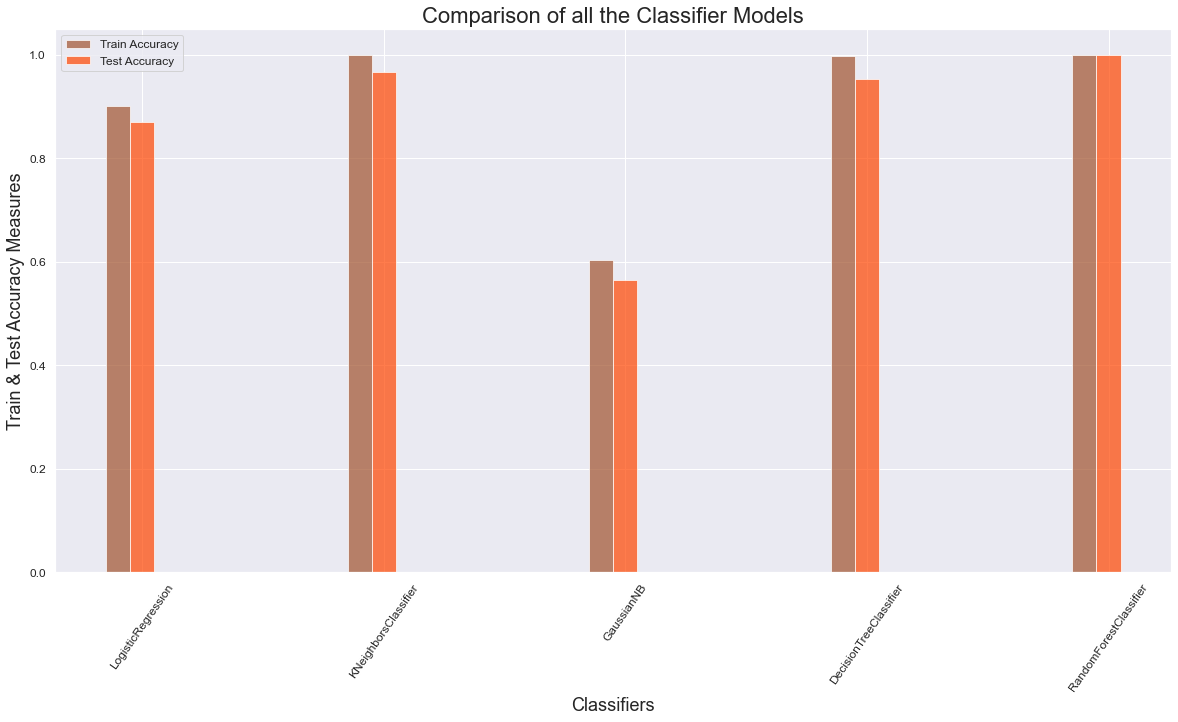

In [525]:
#Storing the classifier names in a new list 'nm_list'

classifier_list = [logistic_model,NNH,GNB,dTree,rfcl]   
nm_list = []

#Adding the Classifier name to the new list 'nm_list'
for cls_nm in classifier_list:
#     print(cls_nm.__class__.__name__)
    nm_list.append(cls_nm.__class__.__name__)

#Creating a graph of multiple bars
ig, ax = plt.subplots(figsize=(20,10))
n_groups = 5
index = np.arange(n_groups)
# index = label
bar_width = 0.1
opacity = .7
train_bar = ax.bar(index, train_acc, bar_width, alpha=opacity, color='Sienna', label='Train Accuracy')
test_bar = ax.bar(index + bar_width, test_acc, bar_width, alpha=opacity, color='orangered', label='Test Accuracy')
ax.set_xlabel('Classifiers',  fontsize = 18)
ax.set_ylabel('Train & Test Accuracy Measures',  fontsize = 18)
ax.set_title('Comparison of all the Classifier Models',  fontsize = 22)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(nm_list, fontsize = 1)
ax.tick_params(labelsize=12)

#Changing alignment of labels in x axis
for c in ax.get_xticklabels():
    c.set_rotation(55)
    
ax.legend(fontsize = 12, loc = 'best')

plt.show()

### Comparing the performance measures to find the best model

In [526]:
#Creating numpy arrays to store the model performance measures to use it for visualization

acc_arr = []   #Array for Accuracy values
mis_arr = []   #Array for Misclassification values
sen_arr = []   #Array for Sensitivity values
spec_arr = []  #Array for Specificity values
prec_arr = []  #Array for Precision values

#### Logistic Regression

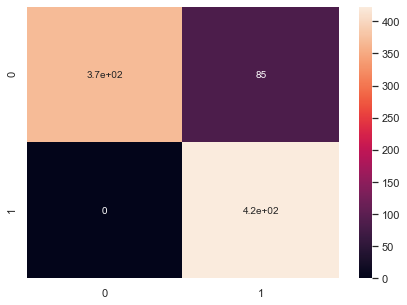

In [527]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (7,5))

sns.heatmap(cm_lr, annot=True)

plt.show() 

In [528]:
#User defined function to find the confusion matrix values

def ConfusionMatrix(matrix):
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if i == 0:
                if j == 0:
                    tn = matrix[i][j]
                else:
                    fp = matrix[i][j]
            if i == 1:
                if j == 0:
                    fn = matrix[i][j]
                else:
                    tp = matrix[i][j]
        j = 0
    return tp,tn,fp,fn

In [529]:

TP,TN,FP,FN = ConfusionMatrix(cm_lr)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of logistic regression classifier on test set: 90.32%
Misclassification Rate: It is often wrong: 9.68%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 81.32%
Precision: When it predicts yes, how often is it correct: 83.27%


#### K Nearest Neighbor Model

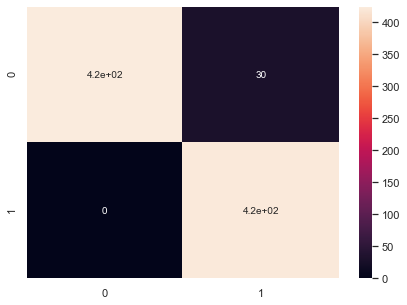

In [530]:
knn_lr = confusion_matrix(y_test,y_pred_knn_enh)

plt.figure(figsize = (7,5))

sns.heatmap(knn_lr, annot=True)

plt.show() 

In [531]:

TP,TN,FP,FN = ConfusionMatrix(knn_lr)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of KNN classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of KNN classifier on test set: 96.58%
Misclassification Rate: It is often wrong: 3.42%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 93.41%
Precision: When it predicts yes, how often is it correct: 93.38%


#### Gaussian Naive Bayes

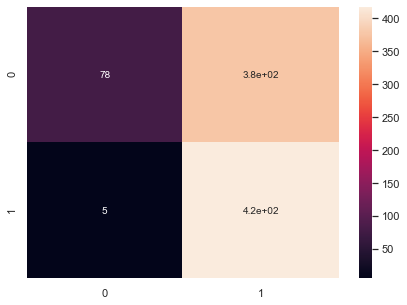

In [532]:
gnb_lr = confusion_matrix(y_test,y_pred_gnb)

plt.figure(figsize = (7,5))

sns.heatmap(gnb_lr, annot=True)

plt.show() 

In [533]:

TP,TN,FP,FN = ConfusionMatrix(gnb_lr)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Naive Bayes classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Naive Bayes classifier on test set: 56.49%
Misclassification Rate: It is often wrong: 43.51%
Sensitivity: When its actually yes how often it predicts yes: 98.82%
Specificity: When its actually no, how often does it predict no: 17.14%
Precision: When it predicts yes, how often is it correct: 52.58%


#### Decision Tree Classifier Model

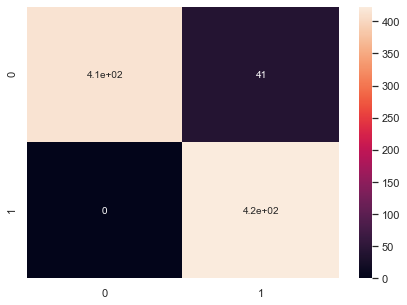

In [534]:
dt_lr = confusion_matrix(y_test,y_pred_dt_enh)

plt.figure(figsize = (7,5))

sns.heatmap(dt_lr, annot=True)

plt.show() 

In [535]:

TP,TN,FP,FN = ConfusionMatrix(dt_lr)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Decision Tree classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Decision Tree classifier on test set: 95.33%
Misclassification Rate: It is often wrong: 4.67%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 90.99%
Precision: When it predicts yes, how often is it correct: 91.16%


#### Random Forest Classifier

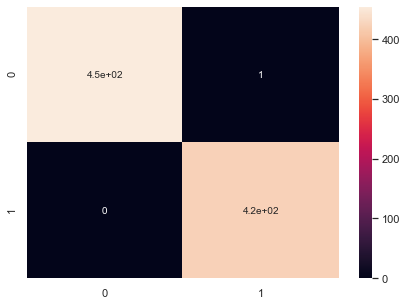

In [536]:
rf_lr = confusion_matrix(y_test,y_pred_rf_enh)

plt.figure(figsize = (7,5))

sns.heatmap(rf_lr, annot=True)

plt.show() 

In [537]:

TP,TN,FP,FN = ConfusionMatrix(rf_lr)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Random Forest classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Random Forest classifier on test set: 99.89%
Misclassification Rate: It is often wrong: 0.11%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 99.78%
Precision: When it predicts yes, how often is it correct: 99.76%


#### Visualization of ROC & AUC

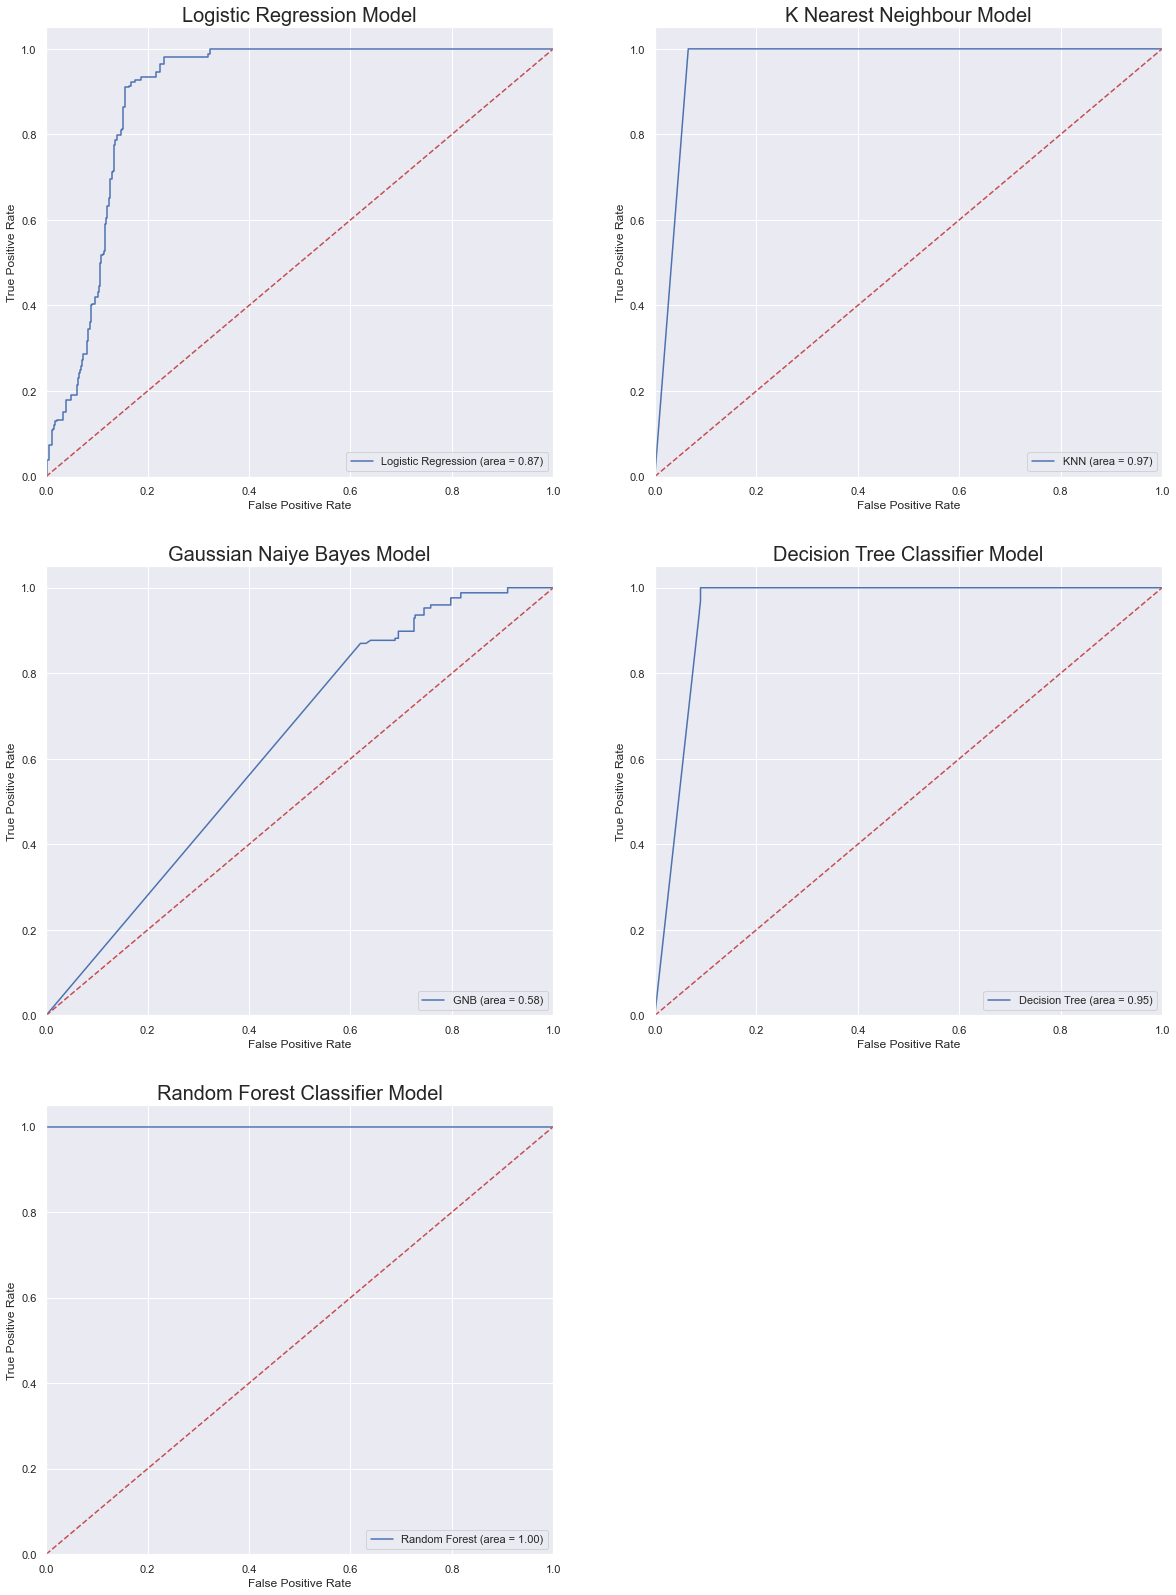

In [538]:
plt.figure(figsize=(20,38))

#Logistic Regression

logit_roc_auc = roc_auc_score(pca_y_test, logistic_model1.predict(pca_X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(pca_y_test, logistic_model1.predict_proba(pca_X_test)[:,1])
# plt.figure()
plt.subplot(4,2,1)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model', fontsize = 20)
plt.legend(loc="lower right")

# K Nearest Neighbour Algorithm

KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(4,2,2)
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Nearest Neighbour Model', fontsize = 20)
plt.legend(loc="lower right")

#Gaussian Naiye Bayes Algorithm

GNB_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(4,2,3)
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naiye Bayes Model', fontsize = 20)
plt.legend(loc="lower right")

# Decision Tree Classifier Algorithm

dt_roc_auc = roc_auc_score(y_test, dTree.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, dTree.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(4,2,4)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier Model', fontsize = 20)
plt.legend(loc="lower right")

# Random Forest Classifier Algorithm

rf_roc_auc = roc_auc_score(y_test, rfcl.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(4,2,5)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Model', fontsize = 20)
plt.legend(loc="lower right")

plt.show()

#### Visualizing the performance measures of all the models in a graph

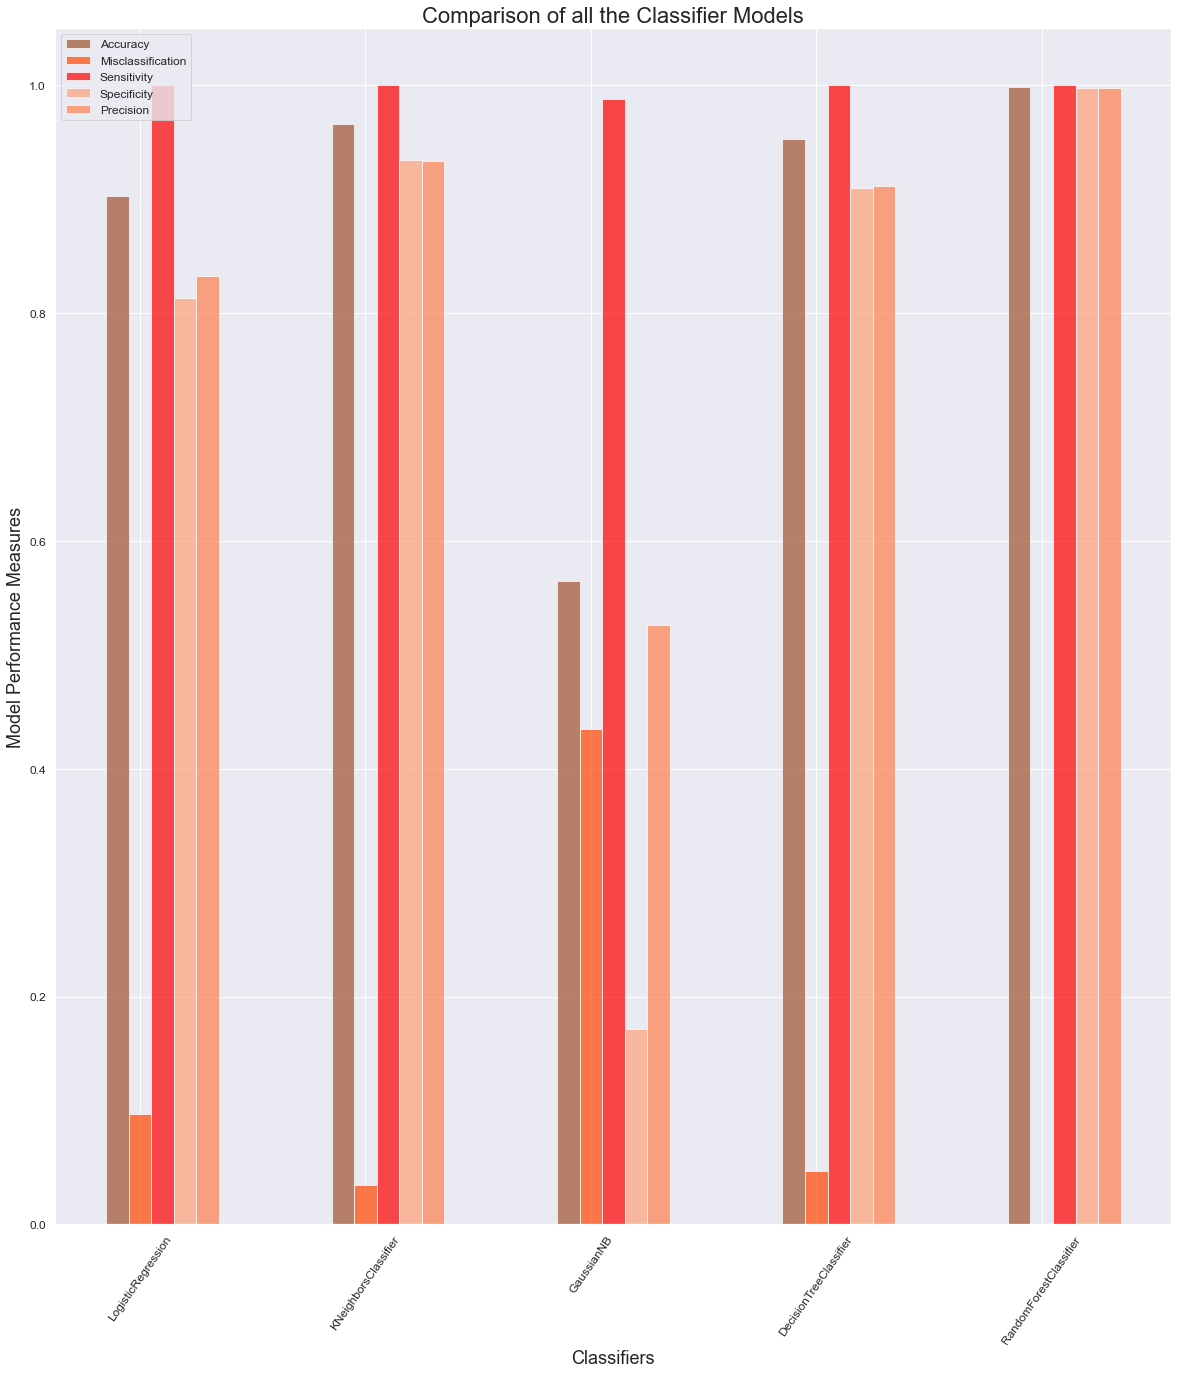

In [539]:

#Creating a graph of multiple bars
ig, ax = plt.subplots(figsize=(20,22))
n_groups = 5
index = np.arange(n_groups)
# index = label
bar_width = 0.1
opacity = .7
acc_bar = ax.bar(index, acc_arr, bar_width, alpha=opacity, color='Sienna', label='Accuracy')
mis_bar = ax.bar(index + bar_width, mis_arr, bar_width, alpha=opacity, color='orangered', label='Misclassification')
sen_bar = ax.bar(index + (bar_width*2), sen_arr, bar_width, alpha=opacity, color='red', label='Sensitivity')
spec_bar = ax.bar(index + (bar_width*3), spec_arr, bar_width, alpha=opacity, color='lightsalmon', label='Specificity')
prec_bar = ax.bar(index + (bar_width*4), prec_arr, bar_width, alpha=opacity, color='coral', label='Precision')
ax.set_xlabel('Classifiers',  fontsize = 18)
ax.set_ylabel('Model Performance Measures',  fontsize = 18)
ax.set_title('Comparison of all the Classifier Models',  fontsize = 22)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(nm_list, fontsize = 1)
ax.tick_params(labelsize=12)

#Changing alignment of labels in x axis
for c in ax.get_xticklabels():
    c.set_rotation(55)
    
ax.legend(fontsize = 12, loc = 'best')

plt.show()

#### Conclusion on Best Model:

##### As displayed in the graph above, Random Forest Classifer has the highest model performance measures. 

  - Accuracy of Random Forest classifier on test set: 99.89%
  - Misclassification Rate: It is often wrong: 0.11%
  - Sensitivity: When its actually yes how often it predicts yes: 100.00%
  - Specificity: When its actually no, how often does it predict no: 99.78%
  - Precision: When it predicts yes, how often is it correct: 99.76%

- Because this model performed the best when compared to the other models with the below rates in
  - Highest Accuracy: 99.89%
  - Lowest Misclassification: 0.11%
  - Sensitivity: 100%
- And the below rates were comparitively better in this model:  
  - Specificity: 99.78%
  - Precision: 99.76%
- Also, the area under ROC is with 1.00. (More the area under ROC better the model performs)

Also, the classification report shown above says that the model has predicted 100% when it comes to classifying if pass result for in house line testing. It has 100% precision when it comes to classifying if pass result for in house line testing. Also, the confusion matrix shown above shows that only two value has been misclassified.

### Pickling the selected model for future use

In [540]:
import pickle

# save the model to disk
filename = 'best_model.pkl'
pickle.dump(rfcl, open(filename, 'wb'))

### Importing the future data file and using the same to perform the prediction using the best chosen model from above & displaying the prediction results.

In [541]:
unseen_df = pd.read_excel("Future_predictions.xlsx")

In [542]:
#Preparing the data before prediction

unseen_df.drop(unseen_df[dropped_feat],axis = 1, inplace = True)
unseen_df.fillna(0, inplace=True)

In [543]:
#Scaling the data

scaler = StandardScaler().fit(unseen_df)
X_unseen = scaler.transform(unseen_df)

In [544]:
#Loading the model from disk

loaded_model = pickle.load(open(filename, 'rb'))

Ypredict = loaded_model.predict(X_unseen)  
Ypredict

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1], dtype=int64)

### Conclusion

   All the predictions indicate Pass label for all the rows in the future data. There can be a possibility of misclassification in the predictions as the misclassification rate during training was 0.23%. And also, the precision was 99.53%. To avoid the misclassification further & obtain 100% precision & 0% misclassification, we will need to add some more features to the training dataset.